# Importation des librairies

In [1]:
# Configuration du chemin d'accès
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

import eda

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

# NUMPY
import numpy as np

# STATS
import scipy.stats as stats
from scipy.stats import norm, skew
import scipy as sp
from scipy.stats import chi2_contingency

# MATPLOTLIB
import matplotlib as mlp
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline

# PANDAS
import pandas as pd 
pd.set_option("display.max_rows", None, "display.max_columns", None) 

# SEABORN
import seaborn as sns


# Analyse exploratoire de données - Analyse de forme (description des variables)

## Chargement des données

In [2]:
data = pd.read_csv('../data/smoking_driking_dataset_Ver01.csv')
df_smoking_drinking = data.copy()

## Aperçu des données

In [39]:
df_smoking_drinking.head(2)

sex   age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male  35.0   170.0    75.0       90.0         1.0          1.0          1   
1  Male  30.0   180.0    80.0       89.0         0.9          1.2          1   

   hear_right    SBP   DBP   BLDS  tot_chole  HDL_chole  LDL_chole  \
0           1  120.0  80.0   99.0      193.0       48.0      126.0   
1           1  130.0  82.0  106.0      228.0       55.0      148.0   

   triglyceride  hemoglobin  urine_protein  serum_creatinine  SGOT_AST  \
0          92.0        17.1              1               1.0      21.0   
1         121.0        15.8              1               0.9      20.0   

   SGOT_ALT  gamma_GTP  SMK_stat_type_cd DRK_YN  
0      35.0       40.0                 1      Y  
1      36.0       27.0                 3      N

## Dimension des données 

In [5]:
df_smoking_drinking.shape

(991346, 24)

<font color='red'>Nous disposons d'un dataset de n = 991346 entrées, avec 22 variables explicatives et 2 variables cibles.</font> 

## Type des variables

In [7]:
df_smoking_drinking.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object

In [8]:
df_smoking_drinking.dtypes.value_counts()

float64    19
int64       3
object      2
Name: count, dtype: int64

<font color='red'>**Variables explicatives du dataset :**</font> 
- Sex : male, female [catégorielle]
- age : âge de l'individu (arrondi à 5 ans près) [continue]
- height : taille de l'individu (arrondi à 5 cm près) [cm] [continue]
- weight : poids [kg] [continue]
- waistline (non cité dans la description du dataset mais présent) : tour de taille [cm] [continue]
- sight_left : eyesight(left) [continue]
- sight_right : eyesight(right)	[continue]
- hear_left : ouïe gauche, 1(normale), 2(anormale) [catégorielle]
- hear_right : ouïe droite, 1(normale), 2(anormale) [catégorielle]
- SBP : pression artérielle systolique [mmHg] [continue]
- DBP :  pression artérielle diastolique [mmHg] [continue]
- BLDS : glycémie à jeun [mg/dL] [continue]
- tot_chole	: cholesterol total [mg/dL] [continue]
- HDL_chole : taux de cholesterol HDL ("bon" cholesterol) [mg/dL] [continue]
- LDL_chole	: taux de cholesterol LDL ("mauvais" cholesterol) [mg/dL] [continue]
- triglyceride : triglyceride [mg/dL] [continue]
- hemoglobin : hemoglobine [g/dL] [continue]
- urine_protein : protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4) [catégorielle ordinale ?]
- serum_creatinine : creatinine sanguine [mg/dL] [continue]
- SGOT_AST : SGOT (transaminase glutamique-oxaloacétique sérique) AST(Aspartate transaminase)[IU/L] [continue]
- SGOT_ALT : ALT (alanine aminotransférase)[IU/L] [continue]
- gamma_GTP : y-glutamyl transpeptidase[IU/L] [continue]

<font color='red'>**Variables cibles :**</font> 
- SMK_stat_type_cd : Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke) [catégorielle]
- DRK_YN : Drinker or Not [catégorielle]

<font color='red'>Besoin de caster les variables</font> pour identifier correctement les variables quantitatives (continues) et catégorielles :
- de int à float : age, height, weight
- de float à int : hear_left, hear_right, urine_protein, SMK_stat_type_cd

In [15]:
intToFloat = ['age', 'height', 'weight']
floatToInt = ['hear_left', 'hear_right', 'urine_protein', 'SMK_stat_type_cd']

In [17]:
import cleaning

df_smoking_drinking = cleaning.convertType(df_smoking_drinking, intToFloat, floatToInt)

In [19]:
df_smoking_drinking.dtypes

sex                  object
age                 float64
height              float64
weight              float64
waistline           float64
sight_left          float64
sight_right         float64
hear_left             int64
hear_right            int64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein         int64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd      int64
DRK_YN               object
dtype: object

<Axes: ylabel='count'>

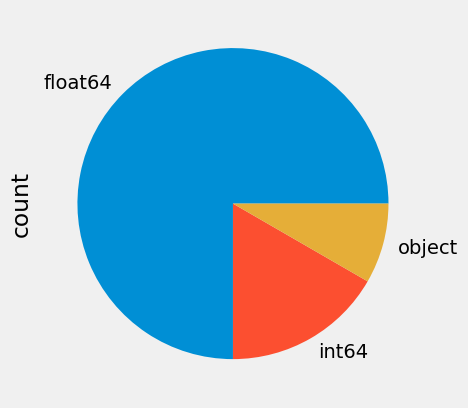

In [20]:
df_smoking_drinking.dtypes.value_counts().plot.pie()

- Variables catégorielles : int64, object
- Variables numériques : float64

## Valeurs manquantes

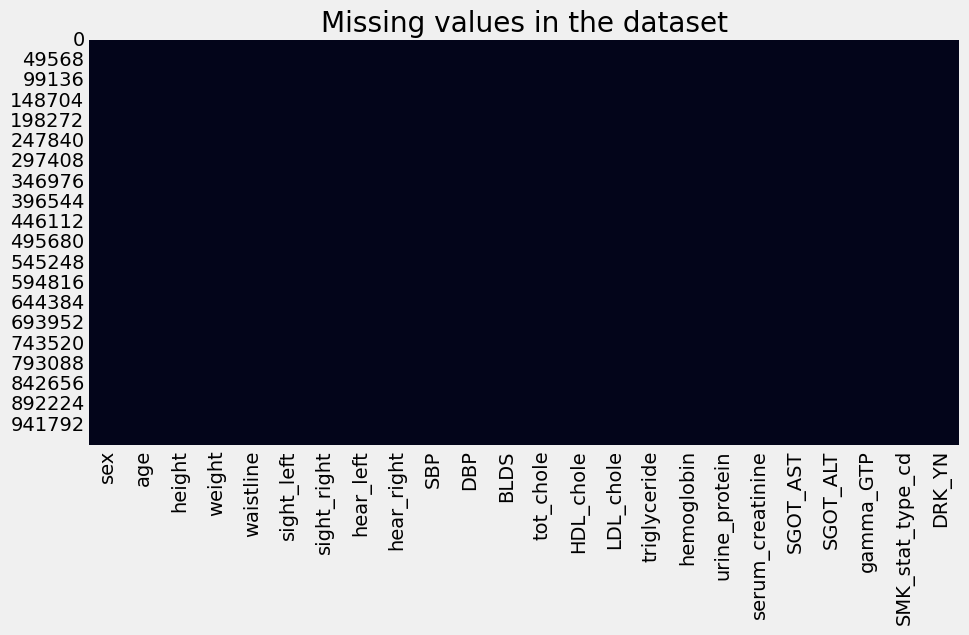

In [21]:
# Visualiser les valeurs manquantes avec seaborn
plt.figure(figsize=(10, 5))
sns.heatmap(df_smoking_drinking.isna(), cbar=False)
plt.title('Missing values in the dataset')
plt.show()

Il n'y a <font color='red'>**pas de valeurs manquantes**</font> dans le dataset, nous n'aurons donc pas besoin d'appliquer de stratégie pour les remplacer lors de l'étape de prétraitement des données.

# Analyse exploratoire de données - Analyse univariée (signification des variables)

## Variable cible 1 : SMK_stat_type_cd

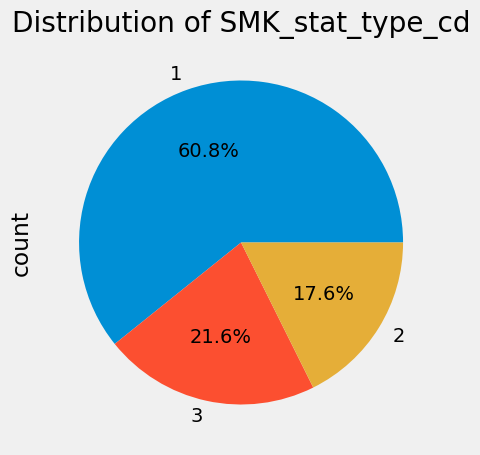

In [22]:
# Affichage des valeurs uniques de la variable SMK_stat_type_cd sous forme de camembert
plt.figure(figsize=(10, 5))
df_smoking_drinking['SMK_stat_type_cd'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of SMK_stat_type_cd')
plt.show()

<font color='red'>**=> Les classes sont déséquilibrées, cela doit être pris en compte pour le choix de la métrique d'évaluation des modèles**</font> 

## Variable cible 2 : DRK_YN

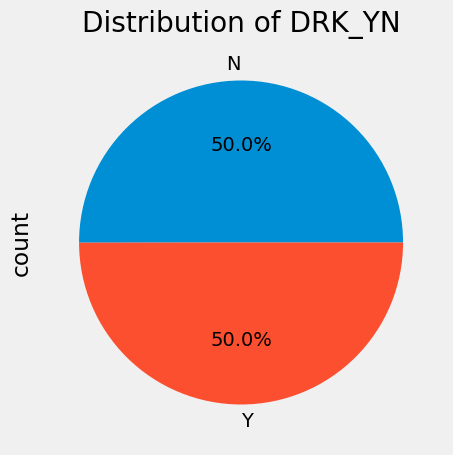

In [23]:
# Affichage des valeurs uniques de la variable DRK_YN sous forme de camembert
plt.figure(figsize=(10, 5))
df_smoking_drinking['DRK_YN'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of DRK_YN')
plt.show()

<font color='red'>**=> Les classes sont presques parfaitement équilibrées, cela ne poserait donc pas problème d'utiliser par exemple l'accuracy comme score d'évaluation des modèles de classification**</font> 

## Variables qualitatives

In [24]:
cat_features = df_smoking_drinking.select_dtypes(include = ['int64', 'object']).columns
cat_features = cat_features.drop(['DRK_YN', 'SMK_stat_type_cd'])
cat_features

Index(['sex', 'hear_left', 'hear_right', 'urine_protein'], dtype='object')

In [25]:
for feature in cat_features:
    print(f'{feature :-<30} {df_smoking_drinking[feature].unique()}')

sex--------------------------- ['Male' 'Female']
hear_left--------------------- [1 2]
hear_right-------------------- [1 2]
urine_protein----------------- [1 3 2 4 5 6]


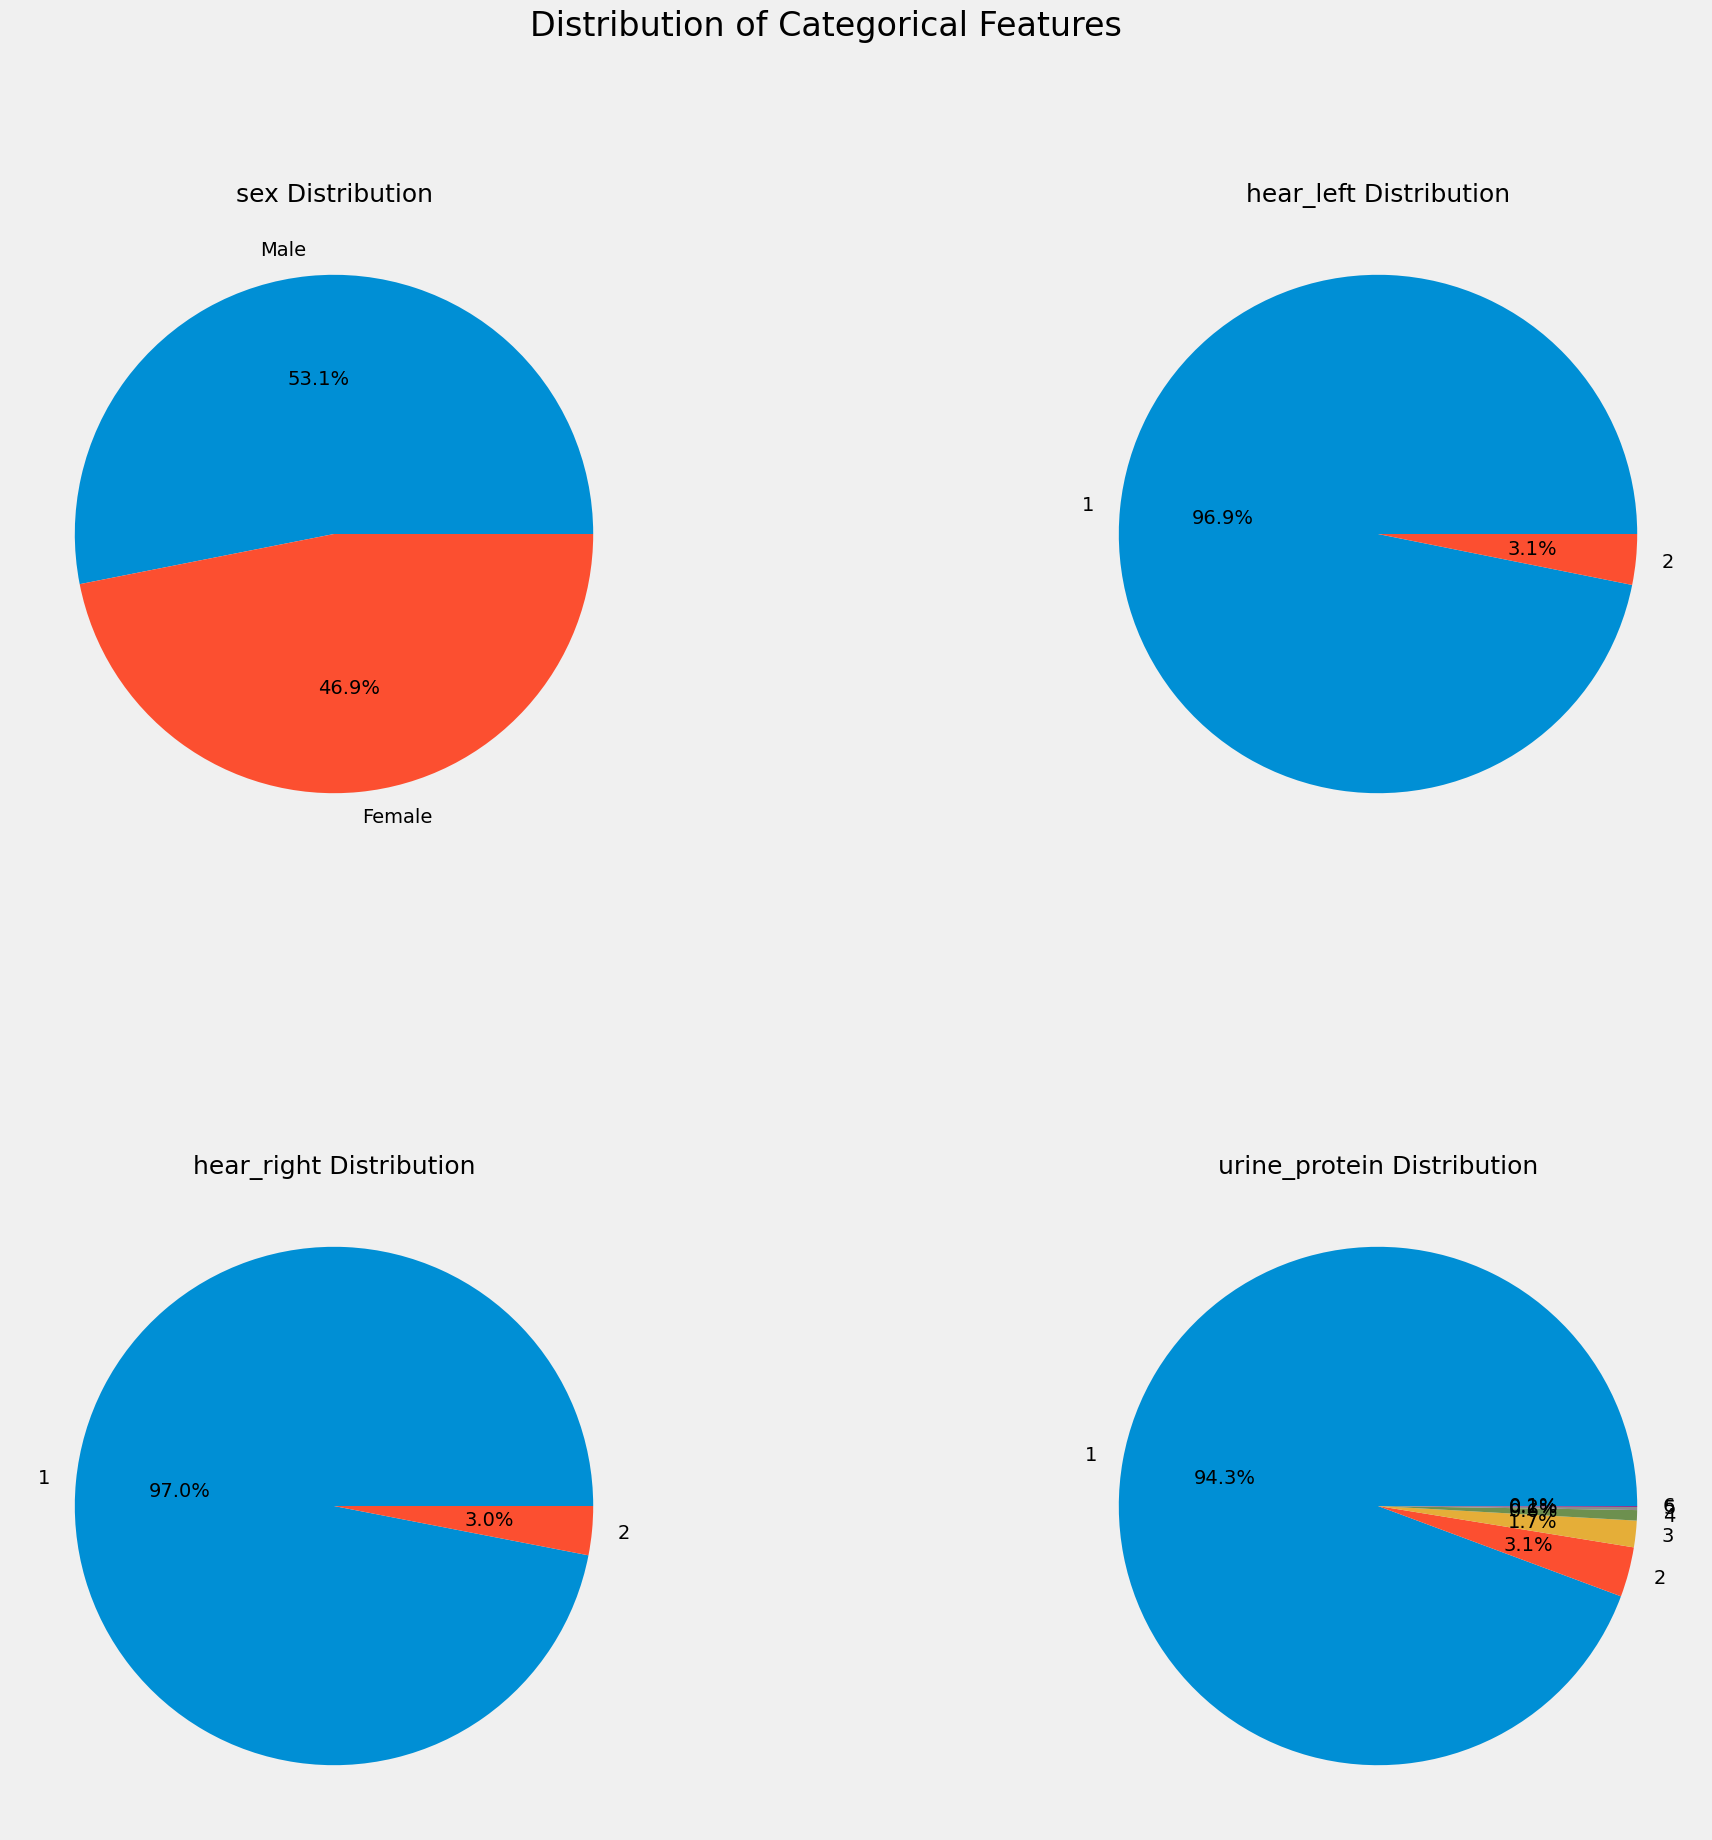

In [26]:
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Distribution of Categorical Features', fontsize=24)

# Loop through the length of the cat_features and keep track of the index
for i, feature in enumerate(cat_features):
    # Add a new subplot iteratively
    ax = plt.subplot(2, 2, i+1)
    # Plot the distribution of each feature
    df_smoking_drinking[feature].value_counts().plot.pie(ax=ax, autopct='%1.1f%%')
    # Chart formatting
    ax.set_title(f'{feature} Distribution', fontsize=18)
    ax.set_ylabel("")

plt.show()


Toutes les variables explicatives catégorielles sont **binaires**. Nous avons une proportion d'homme/femme similaire, mais le reste des variables catégorielles ont des classes <font color='red'>**TRES fortement déséquilibrées**.</font> 

## Variables numériques

In [27]:
cont_features = df_smoking_drinking.select_dtypes('float64').columns
cont_features

Index(['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right',
       'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole',
       'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST',
       'SGOT_ALT', 'gamma_GTP'],
      dtype='object')

In [28]:
df_smoking_drinking[cont_features].describe()

age         height         weight      waistline  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean       47.614491     162.240625      63.284050      81.233358   
std        14.181339       9.282957      12.514241      11.850323   
min        20.000000     130.000000      25.000000       8.000000   
25%        35.000000     155.000000      55.000000      74.100000   
50%        45.000000     160.000000      60.000000      81.000000   
75%        60.000000     170.000000      70.000000      87.800000   
max        85.000000     190.000000     140.000000     999.000000   

          sight_left    sight_right            SBP            DBP  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean        0.980834       0.978429     122.432498      76.052627   
std         0.605949       0.604774      14.543148       9.889365   
min         0.100000       0.100000      67.000000      32.000000   
25%         0.700000       0.700000     112.000000      70.000000   
50%         1.000000       1.000000     120.000000      76.000000   
75%         1.200000       1.200000     131.000000      82.000000   
max         9.900000       9.900000     273.000000     185.000000   

                BLDS      tot_chole      HDL_chole      LDL_chole  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean      100.424447     195.557020      56.936800     113.037692   
std        24.179960      38.660155      17.238479      35.842812   
min        25.000000      30.000000       1.000000       1.000000   
25%        88.000000     169.000000      46.000000      89.000000   
50%        96.000000     193.000000      55.000000     111.000000   
75%       105.000000     219.000000      66.000000     135.000000   
max       852.000000    2344.000000    8110.000000    5119.000000   

        triglyceride     hemoglobin  serum_creatinine       SGOT_AST  \
count  991346.000000  991346.000000     991346.000000  991346.000000   
mean      132.141751      14.229824          0.860467      25.989308   
std       102.196985       1.584929          0.480530      23.493386   
min         1.000000       1.000000          0.100000       1.000000   
25%        73.000000      13.200000          0.700000      19.000000   
50%       106.000000      14.300000          0.800000      23.000000   
75%       159.000000      15.400000          1.000000      28.000000   
max      9490.000000      25.000000         98.000000    9999.000000   

            SGOT_ALT      gamma_GTP  
count  991346.000000  991346.000000  
mean       25.755051      37.136347  
std        26.308599      50.424153  
min         1.000000       1.000000  
25%        15.000000      16.000000  
50%        20.000000      23.000000  
75%        29.000000      39.000000  
max      7210.000000     999.000000

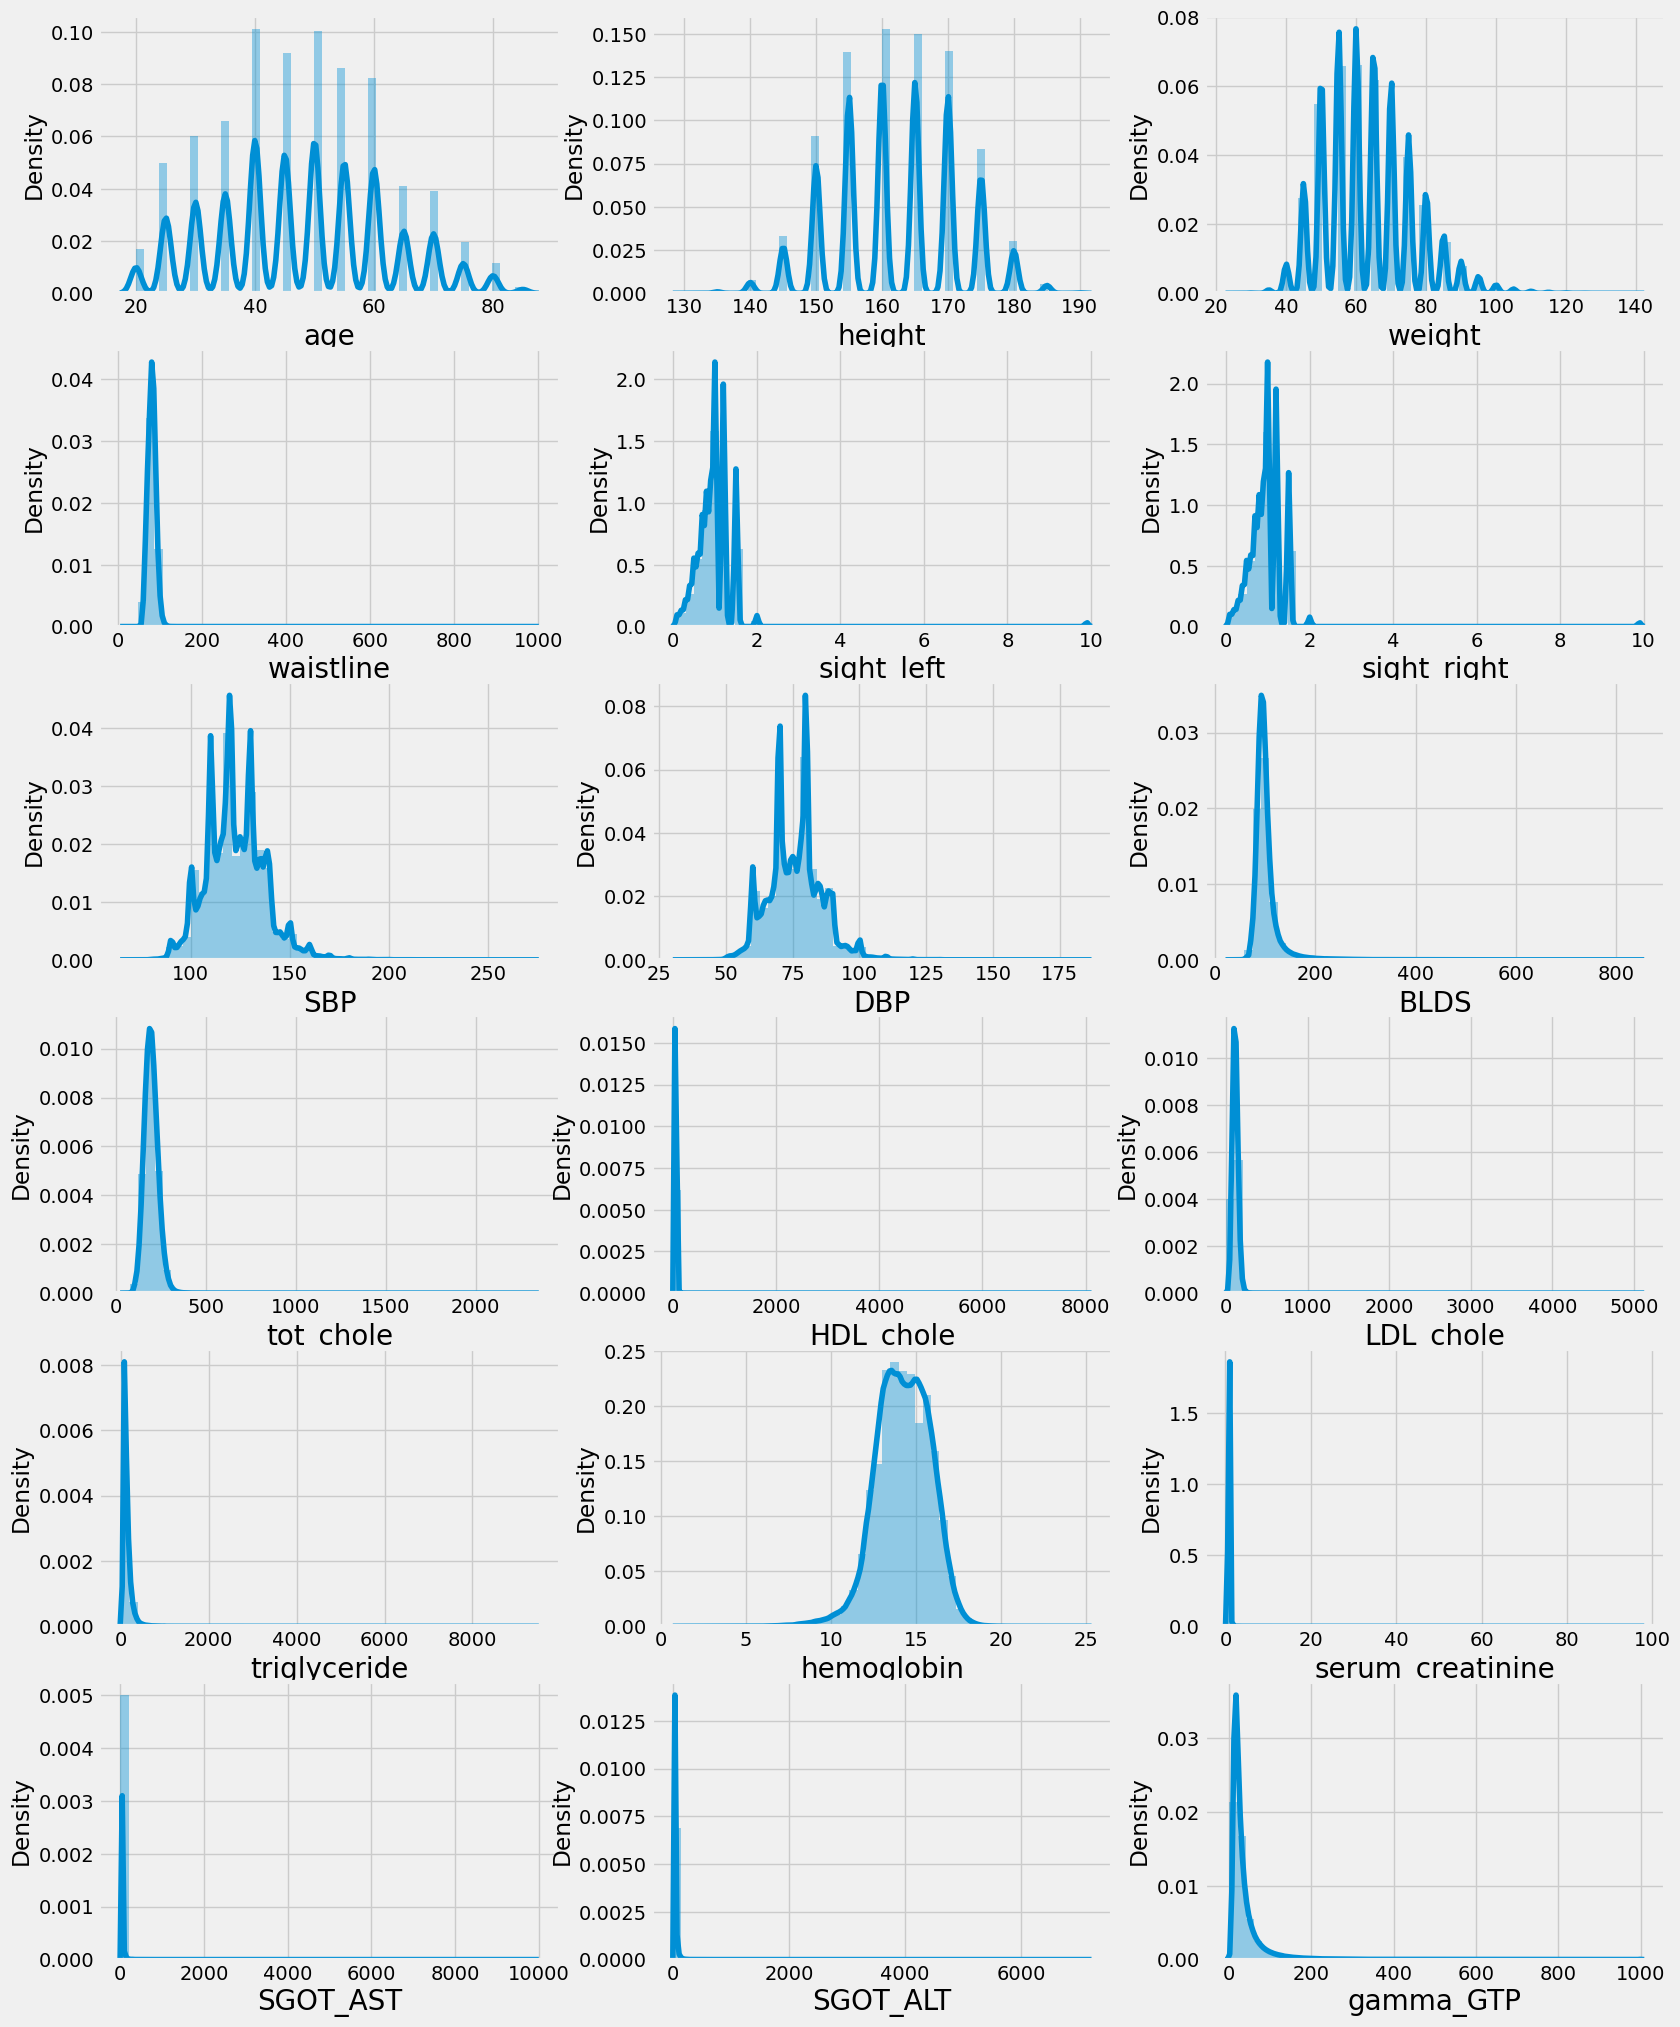

In [72]:
plt.figure(figsize=(18, 24))

for i, feature in enumerate(cont_features):
    # Add a new subplot iteratively
    ax = plt.subplot(6, 3, i + 1)  # 6 rows, 3 columns grid
    # Plot the distribution of each feature
    sns.distplot(df_smoking_drinking[feature], ax=ax)
    # Set the x-axis label
    plt.xlabel(feature, fontsize=20)

plt.show()


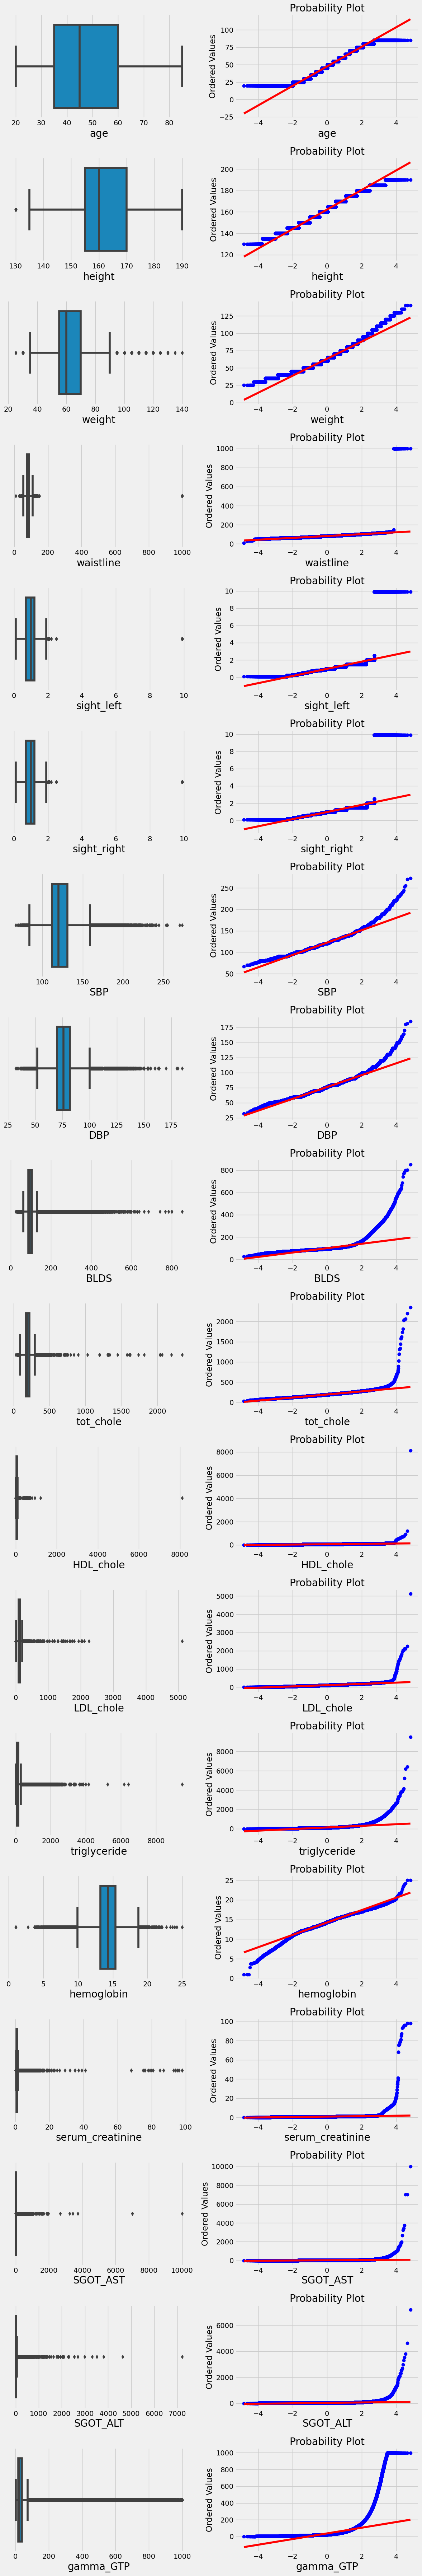

In [73]:
n_features = len(cont_features)
n_cols = 2
n_rows = n_features * 2 // n_cols + (n_features * 2 % n_cols > 0)

plt.figure(figsize=(12, n_rows * 4))

for i, feature in enumerate(cont_features):
    # Create a boxplot
    ax1 = plt.subplot(n_rows, n_cols, i * 2 + 1)
    sns.boxplot(data=df_smoking_drinking, x=feature, ax=ax1)
    ax1.set_xlabel(feature, fontsize=20)

    # Create a probability plot
    ax2 = plt.subplot(n_rows, n_cols, i * 2 + 2)
    scipy.stats.probplot(df_smoking_drinking[feature].dropna(), plot=ax2)
    ax2.set_xlabel(feature, fontsize=20)

plt.tight_layout()
plt.show()

- (age, height et weight ne sont pas vraiment interprétables graphiquement car tronquées)
- Les variables **ne semblent pas standardisées** (pas de distribution de moyenne 0 et d'écart-type 1) => à prendre en compte lors du pré-traitement
- Beaucoup de variables sont symétriques et **semblent être gaussiennes** => <font color='red'> à tester par exemple avec un test de conformité à la loi normale</font>

# Analyse exploratoire de données - Analyse bivariée

## Relation variable cible / autres variables

### Variable cible / Variables quantitatives

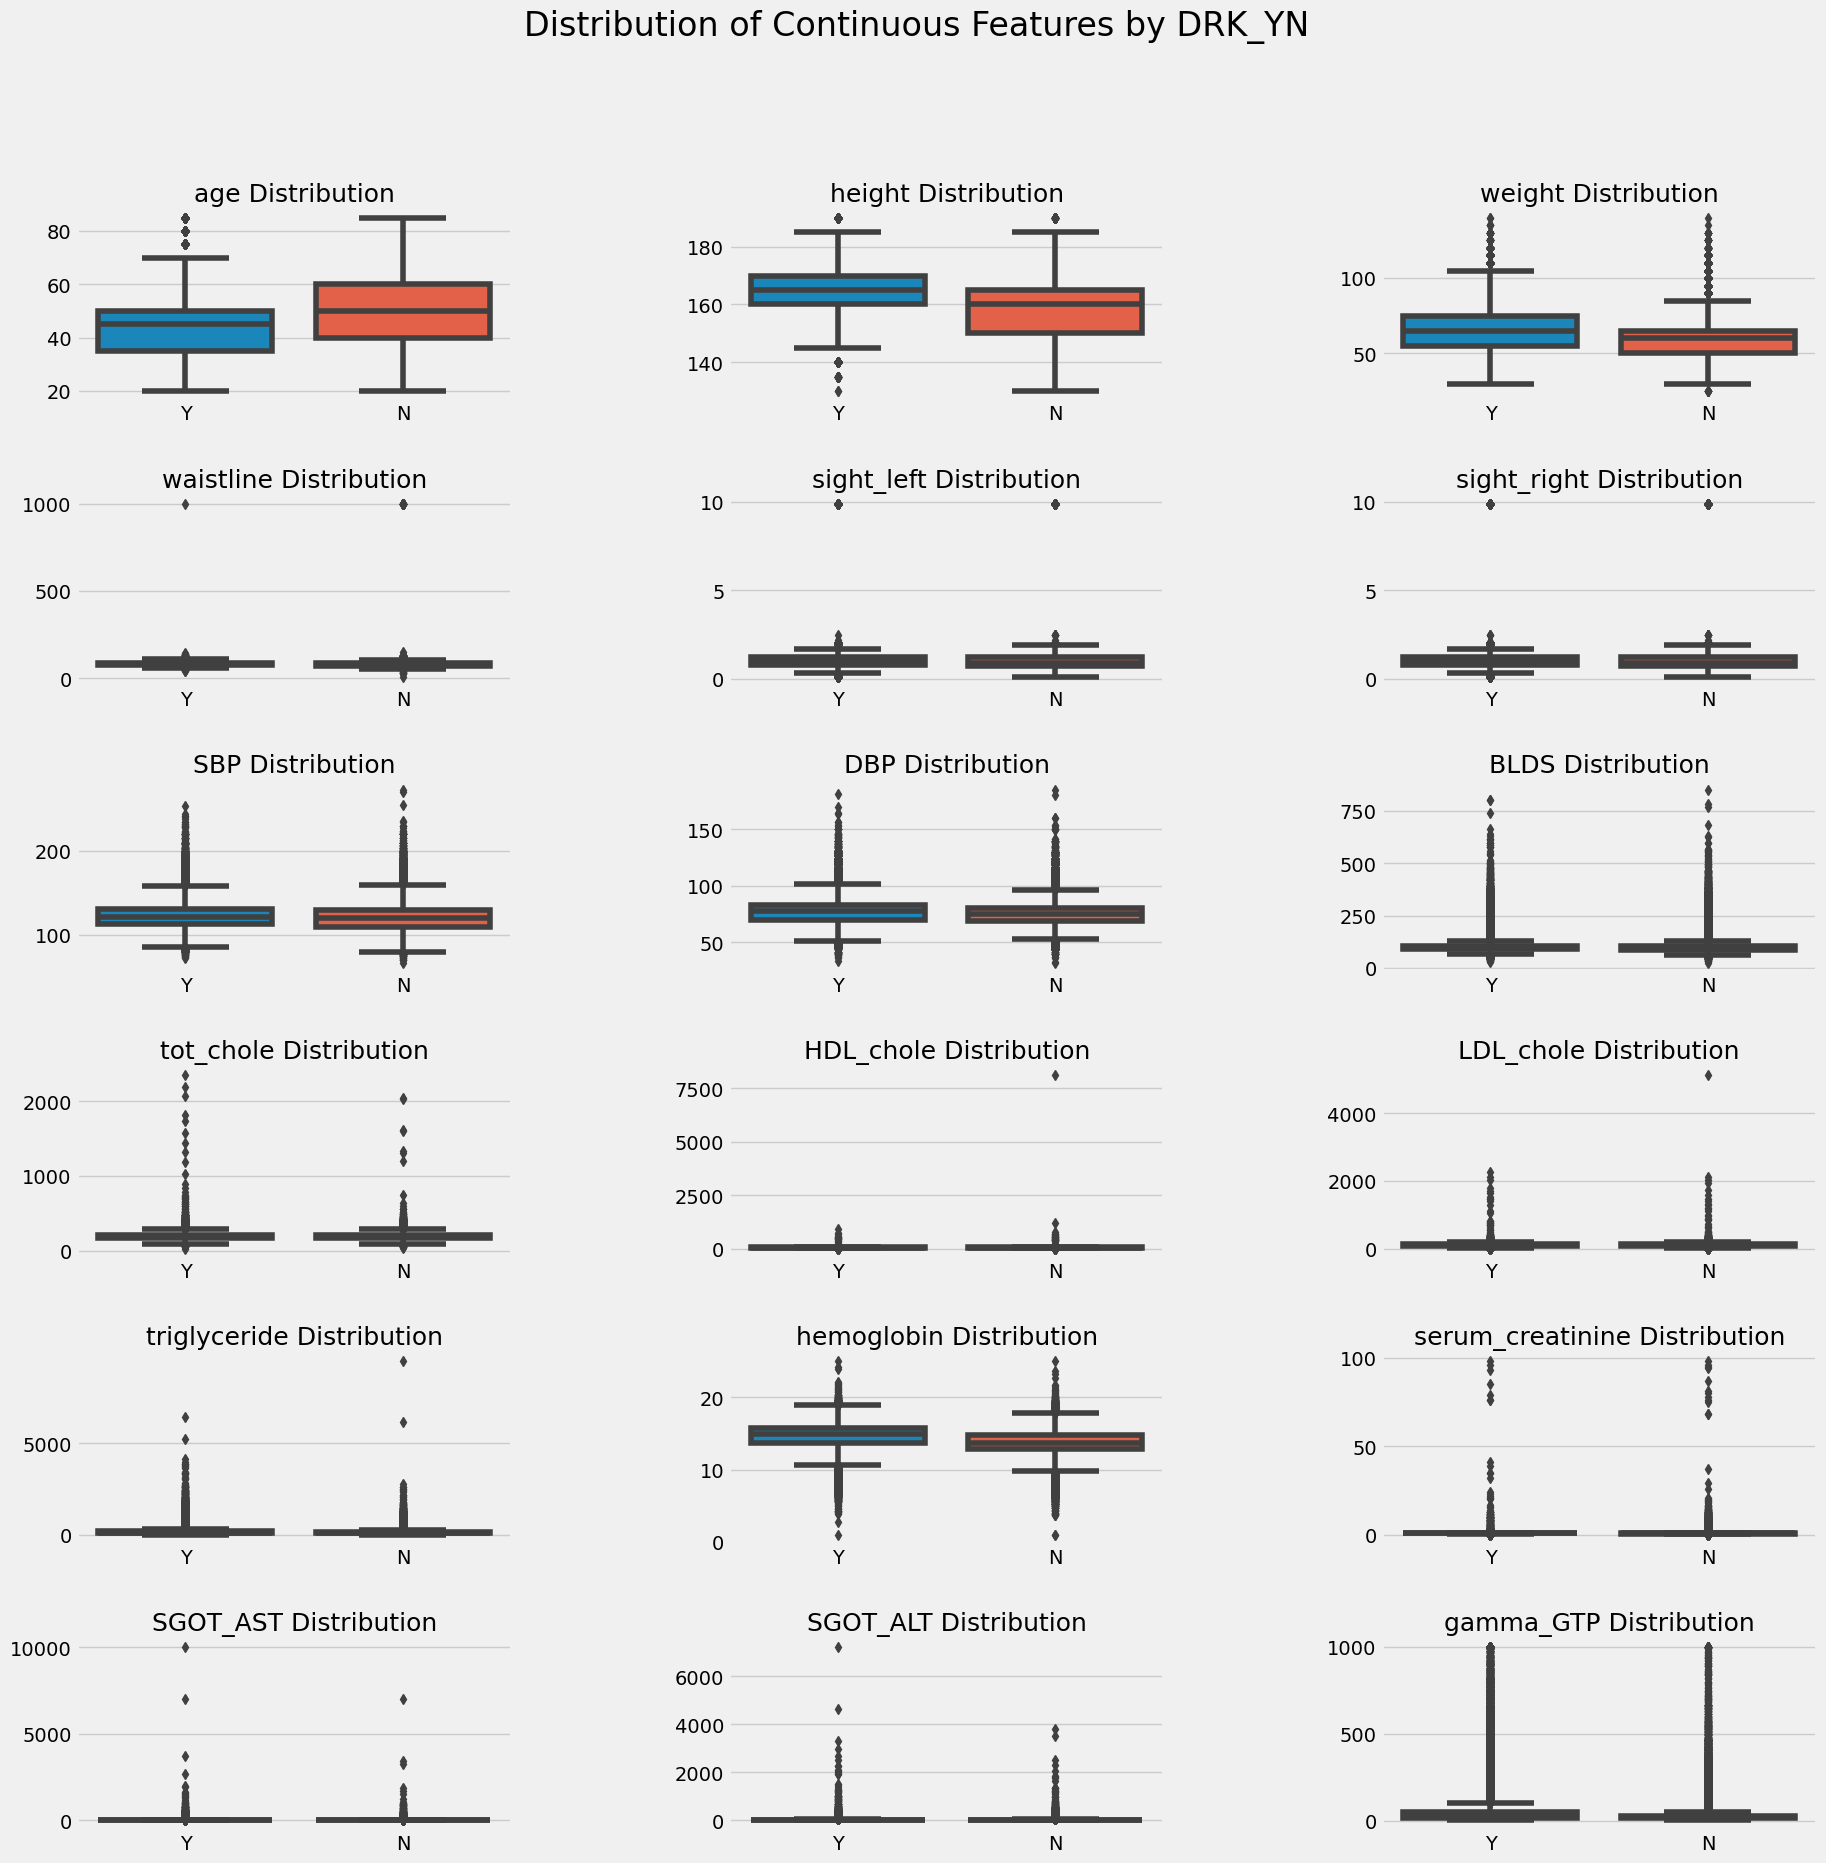

In [76]:
# Tracer les distributions conditionnelles des variables continues par rapport à la variable cible DRK_YN
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Distribution of Continuous Features by DRK_YN', fontsize=24)

# Loop through the length of the cont_features and keep track of the index
for i, feature in enumerate(cont_features):
    # Add a new subplot iteratively
    ax = plt.subplot(6, 3, i+1)
    # Plot the distribution of each feature
    sns.boxplot(data=df_smoking_drinking, x='DRK_YN', y=feature, ax=ax)
    # Chart formatting
    ax.set_title(f'{feature} Distribution', fontsize=18)
    ax.set_ylabel("")
    ax.set_xlabel("")
plt.show()

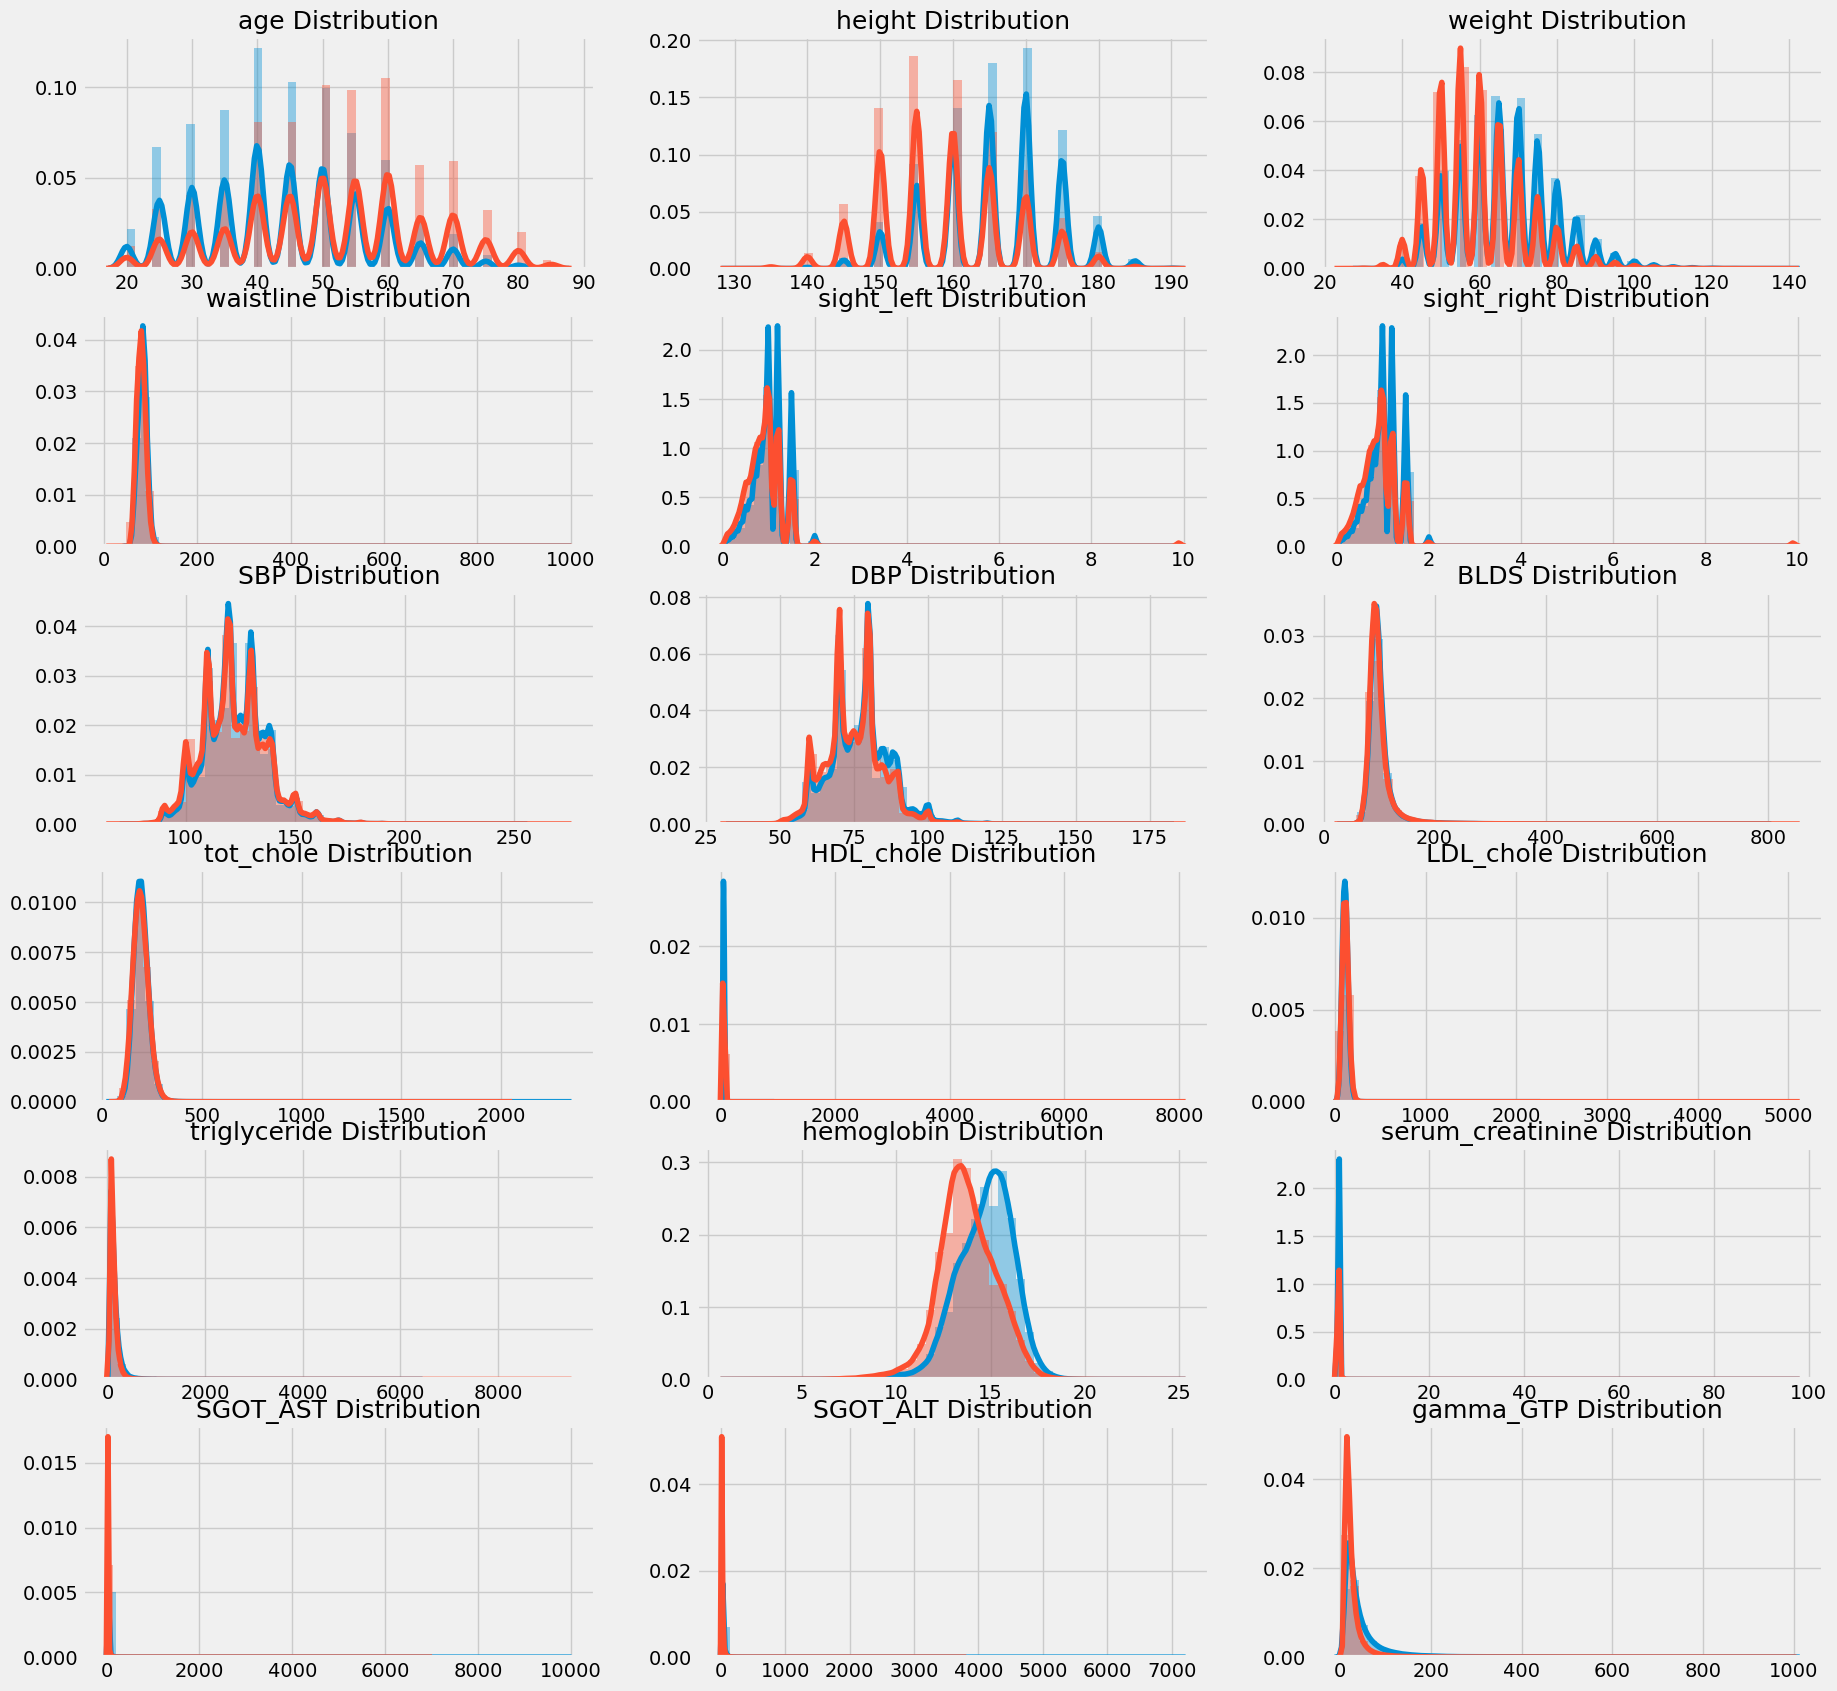

In [81]:
df_drinking_neg = df_smoking_drinking[df_smoking_drinking['DRK_YN'] == 'N']
df_drinking_pos = df_smoking_drinking[df_smoking_drinking['DRK_YN'] == 'Y']

plt.figure(figsize=(20, 20))

for i, feature in enumerate(cont_features):
    # Add a new subplot iteratively
    ax = plt.subplot(6, 3, i+1)
    # Plot the distribution of each feature
    sns.distplot(df_drinking_pos[feature], label='positive')
    sns.distplot(df_drinking_neg[feature], label='negative')
    # Chart formatting
    ax.set_title(f'{feature} Distribution', fontsize=18)
    ax.set_ylabel("")
    ax.set_xlabel("")
plt.show()

<font color='red'>**Interprétation:**</font> 

En observant les distributions conditionnelles des variables continues sachant la variable cible DRK_YN, seule la variable **hemoglobin** semble être différente selon DRK_YN. Cela doit être vérifié par un test statistique. Notons que pour les autres variables, il est très compliqué de différencier les deux distributions, mais que cela ne signifie pas que les variables sont indépendantes dans l'absolu (graphiques peu exploitables).

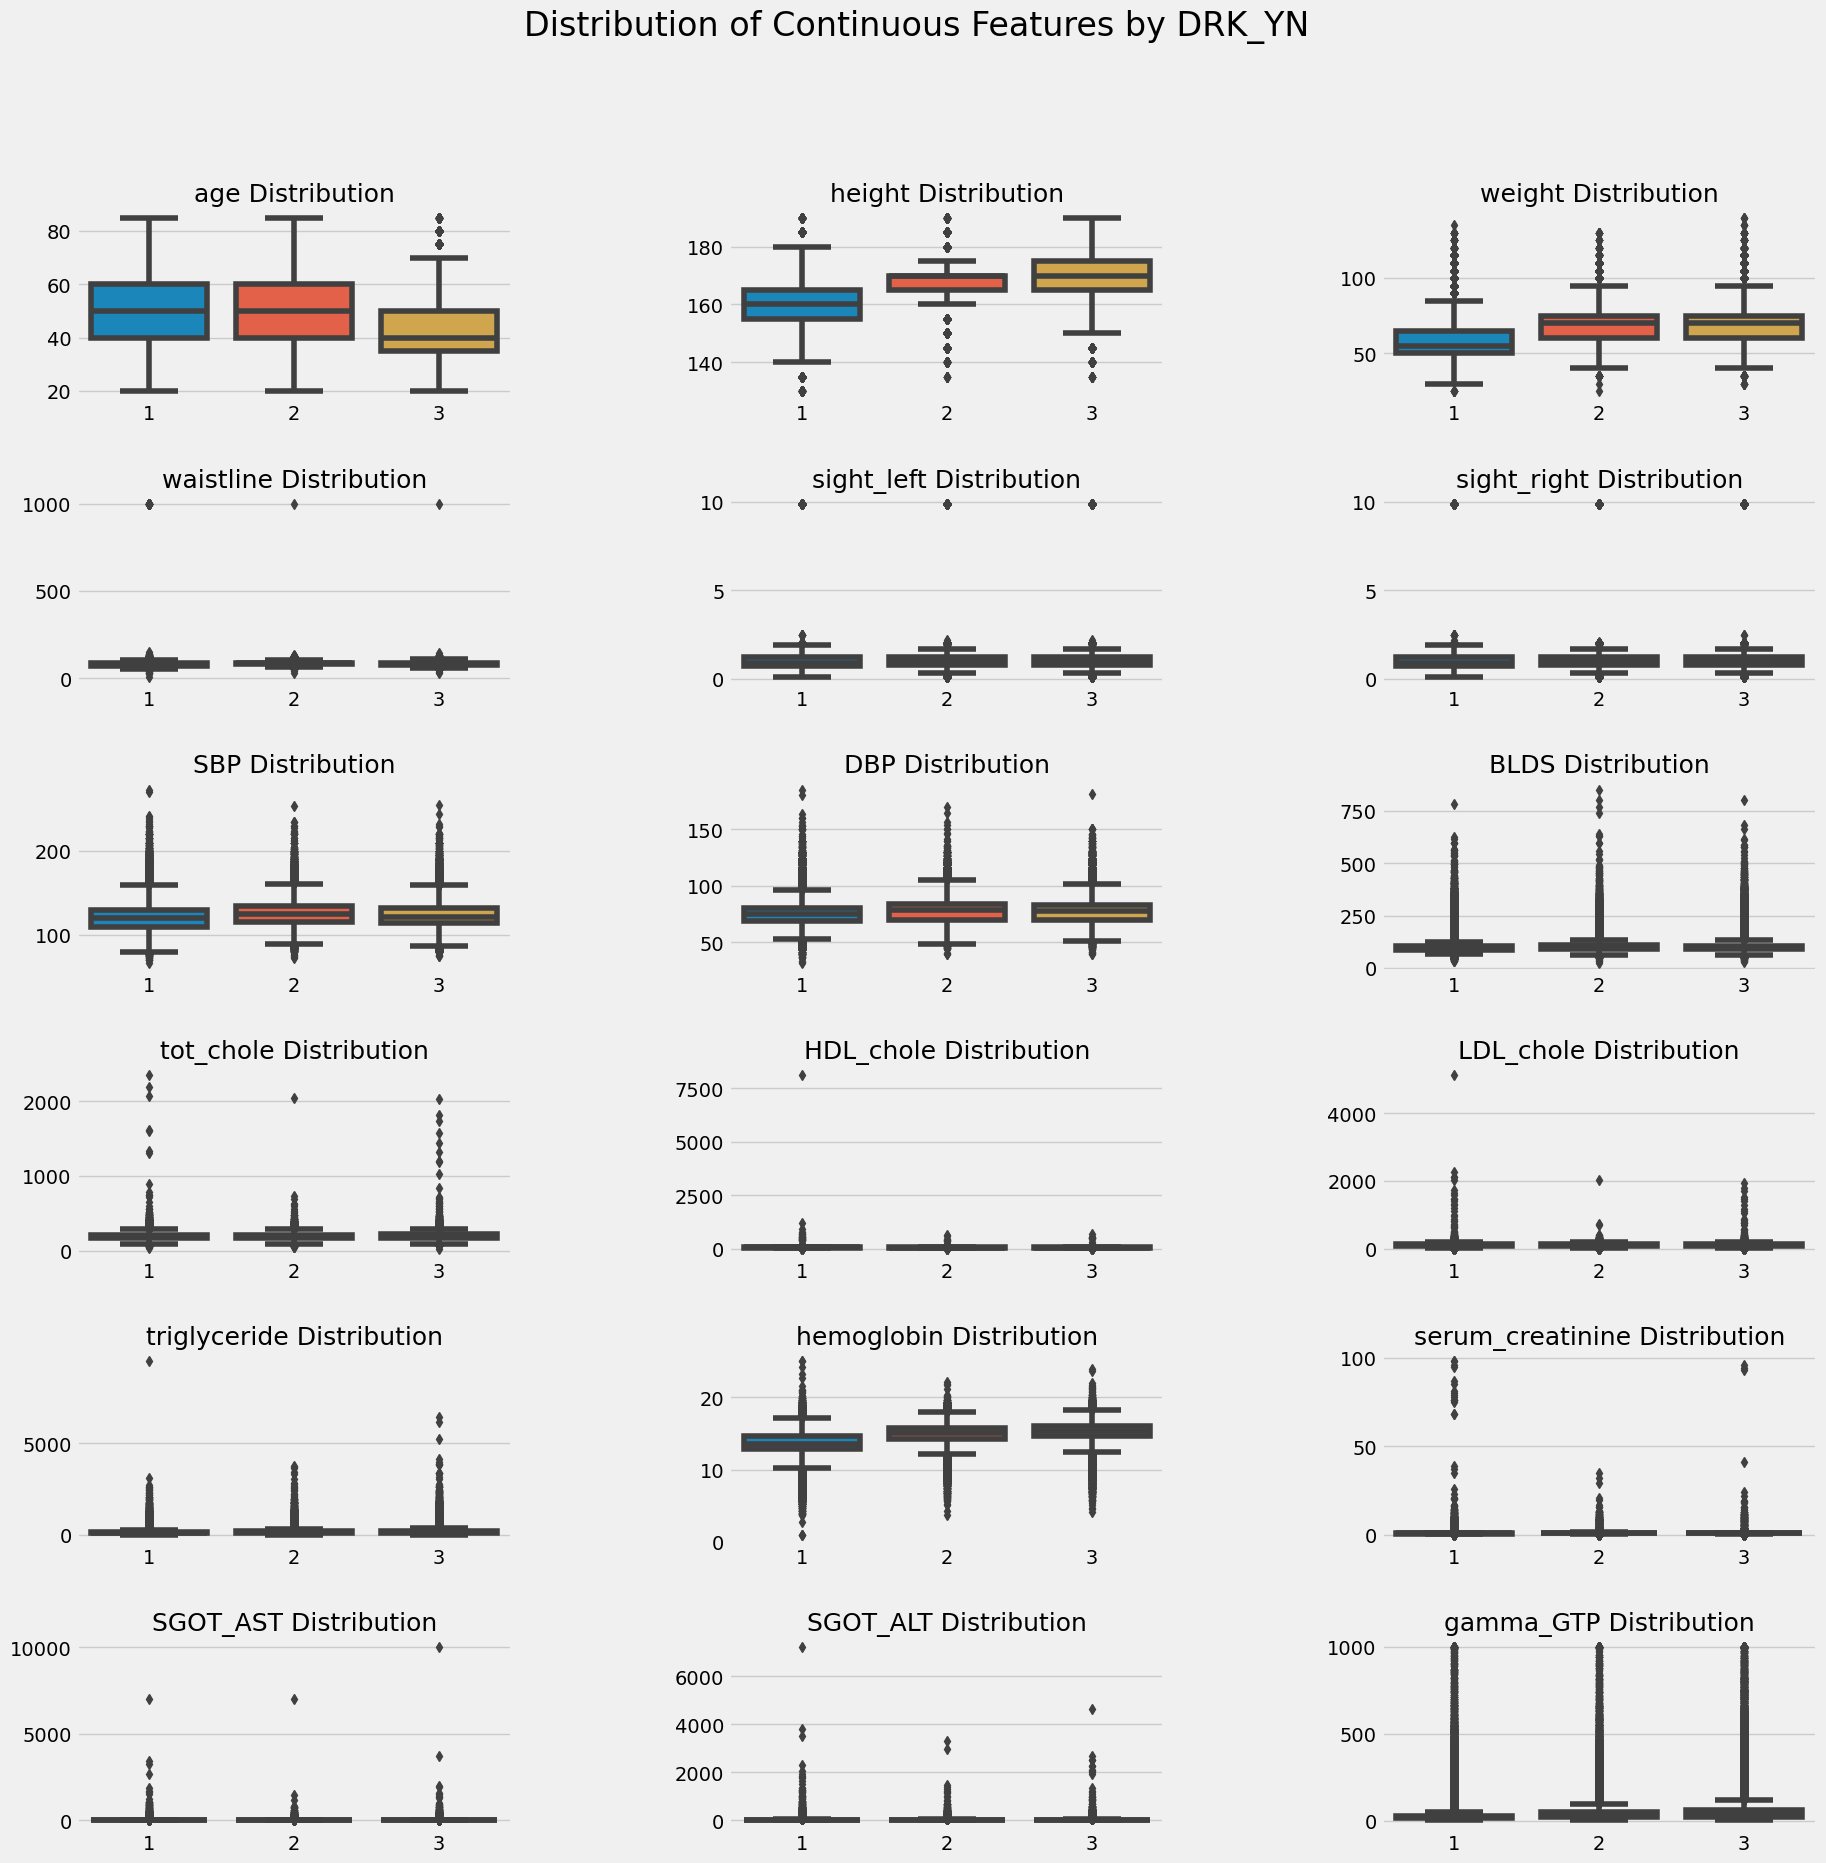

In [80]:
# Tracer les distributions conditionnelles des variables continues par rapport à la variable cible SMK_stat_type_cd
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Distribution of Continuous Features by DRK_YN', fontsize=24)

# Loop through the length of the cont_features and keep track of the index
for i, feature in enumerate(cont_features):
    # Add a new subplot iteratively
    ax = plt.subplot(6, 3, i+1)
    # Plot the distribution of each feature
    sns.boxplot(data=df_smoking_drinking, x='SMK_stat_type_cd', y=feature, ax=ax)
    # Chart formatting
    ax.set_title(f'{feature} Distribution', fontsize=18)
    ax.set_ylabel("")
    ax.set_xlabel("")
plt.show()

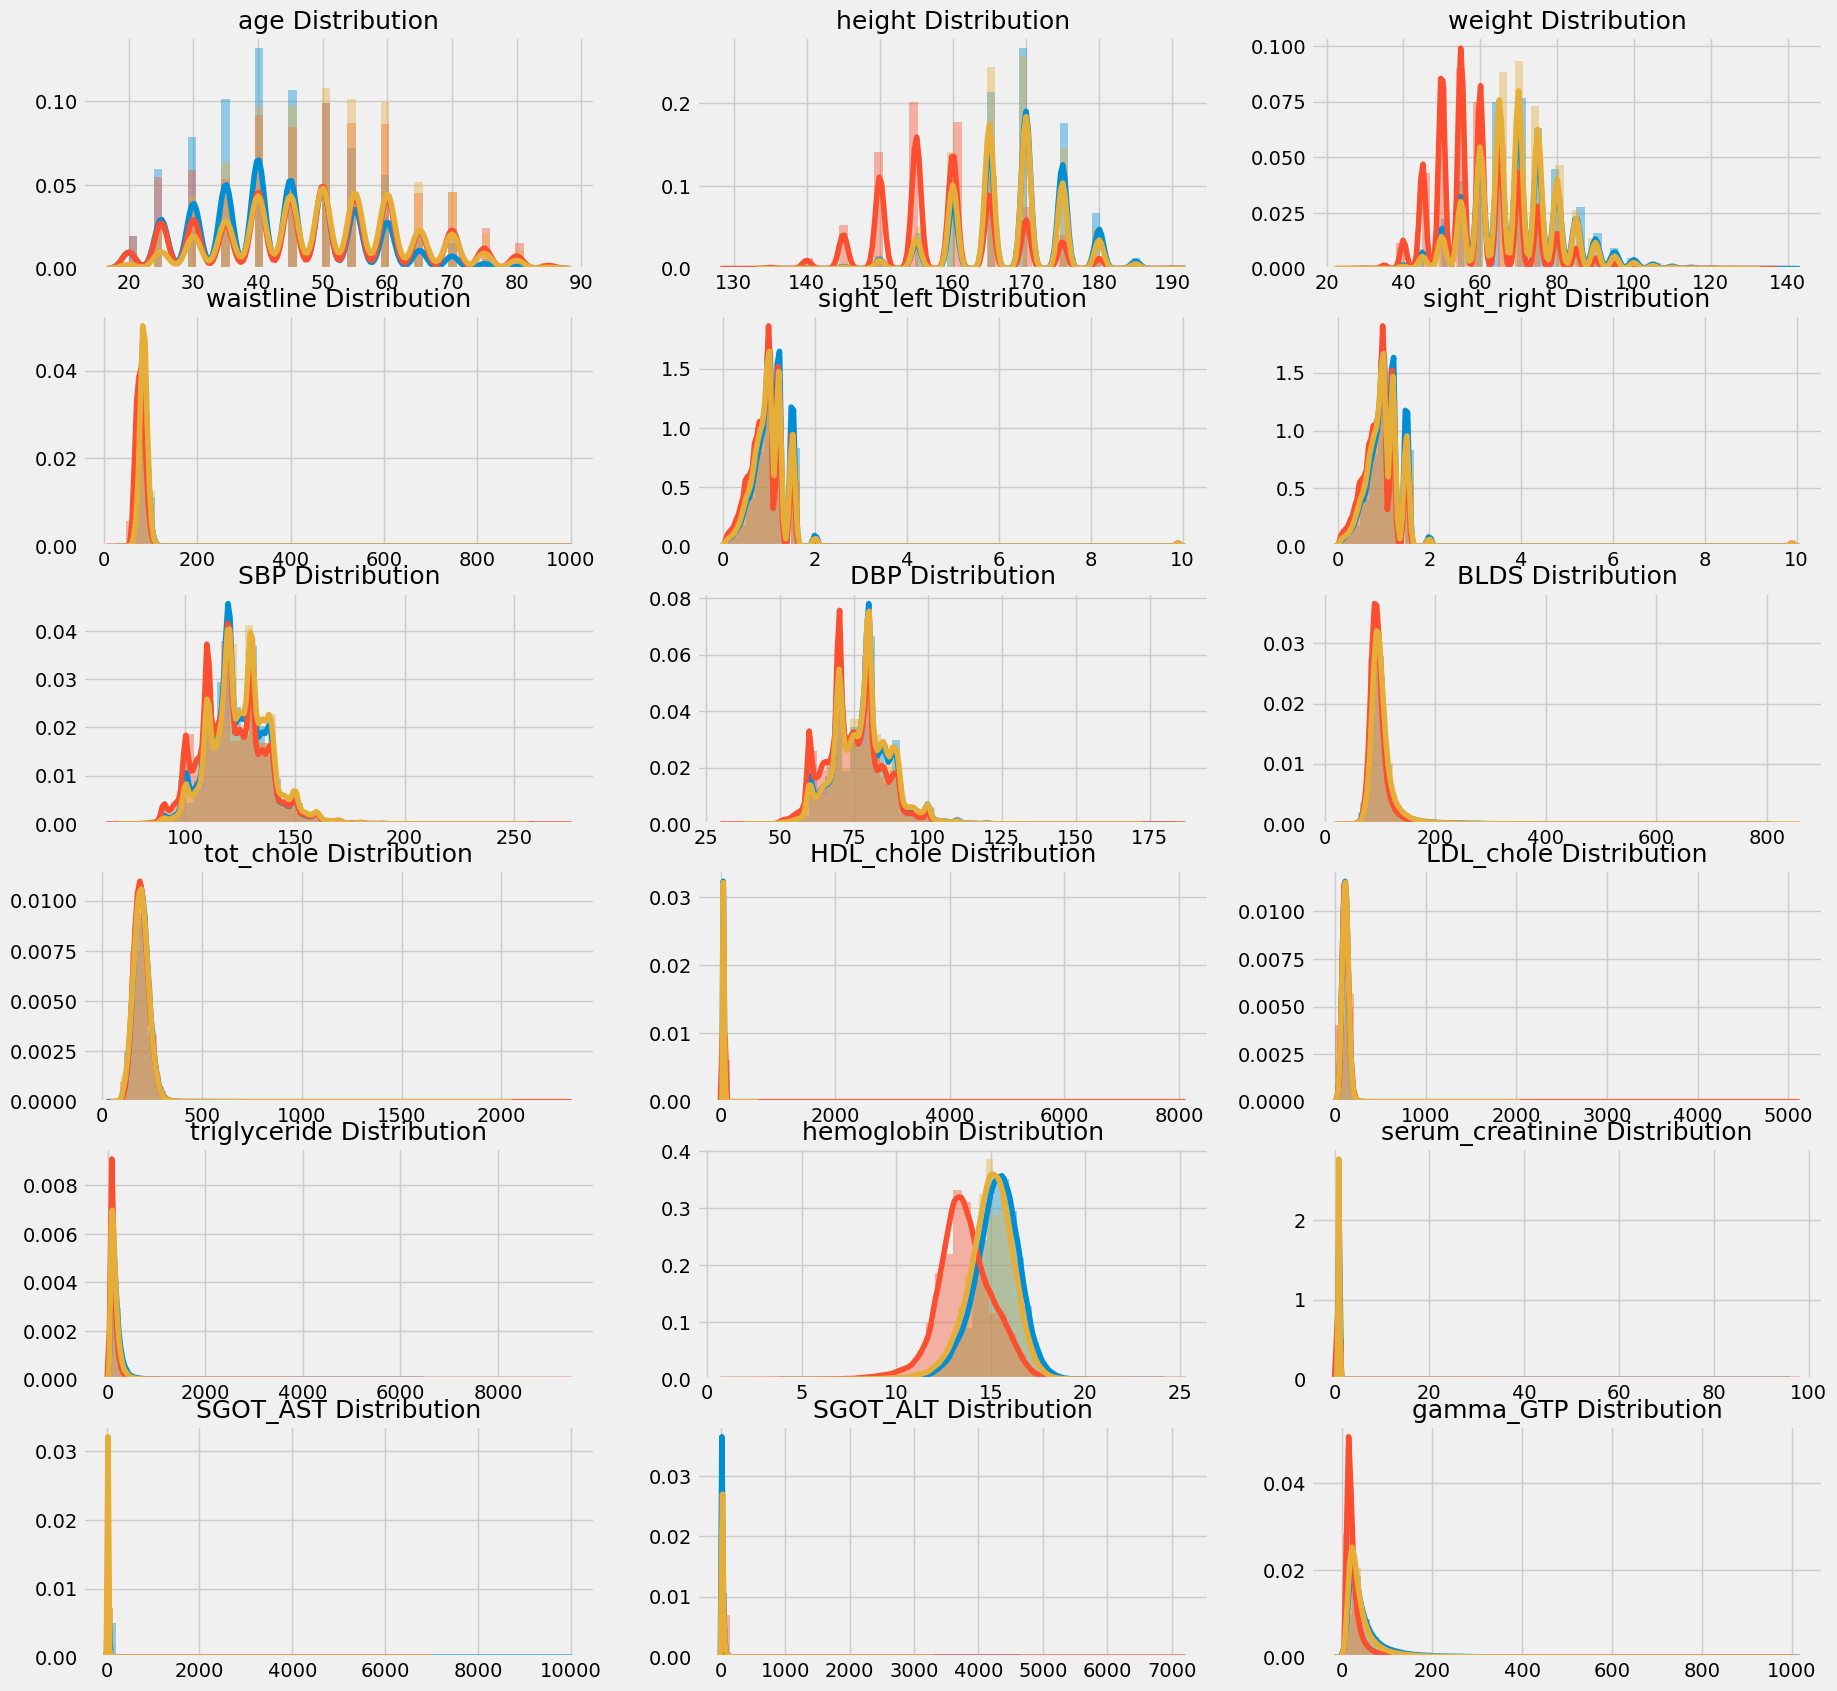

In [82]:
df_smoking_pos = df_smoking_drinking[df_smoking_drinking['SMK_stat_type_cd'] == 3]
df_smoking_quit = df_smoking_drinking[df_smoking_drinking['SMK_stat_type_cd'] == 2]
df_smoking_neg = df_smoking_drinking[df_smoking_drinking['SMK_stat_type_cd'] == 1]

plt.figure(figsize=(20, 20))

for i, feature in enumerate(cont_features):
    # Add a new subplot iteratively
    ax = plt.subplot(6, 3, i+1)
    # Plot the distribution of each feature
    sns.distplot(df_smoking_pos[feature], label='positive')
    sns.distplot(df_smoking_neg[feature], label='negative')
    sns.distplot(df_smoking_quit[feature], label='quit')
    # Chart formatting
    ax.set_title(f'{feature} Distribution', fontsize=18)
    ax.set_ylabel("")
    ax.set_xlabel("")
plt.show()

<font color='red'>**Interprétation:**</font> 

En étudiant les distributions conditionnelles, nous remarquons que la variable qui indique si un individu est fumeur, non-fumeur ou ancien fumeur semble être sensible aux variables suivantes :
- height : semble être différente pour les non fumeurs
- weight : semble être légèrement différent pour les non fumeurs
- hemoglobin : semble être différent pour les non fumeurs
- gamma_GTP et SGOT_ALT : il semble y avoir une différence mais graphique peu lisible

### Variable cible / Variables qualitatives

Table de contingence pour sex:
 sex     Female    Male
DRK_YN                
N       323751  172093
Y       141170  354306
Chi-2 Statistique: 134773.54988612374, p-value: 0.0

Table de contingence pour hear_left:
 hear_left       1      2
DRK_YN                  
N          475177  20667
Y          484921  10555
Chi-2 Statistique: 3373.103168822793, p-value: 0.0

Table de contingence pour hear_right:
 hear_right       1      2
DRK_YN                   
N           475771  20073
Y           485338  10138
Chi-2 Statistique: 3361.579189865475, p-value: 0.0

Table de contingence pour urine_protein:
 urine_protein       1      2     3     4     5    6
DRK_YN                                             
N              468371  14200  8363  3467  1145  298
Y              466782  16648  8040  2960   832  214
Chi-2 Statistique: 306.52016390570776, p-value: 3.969566465036778e-64



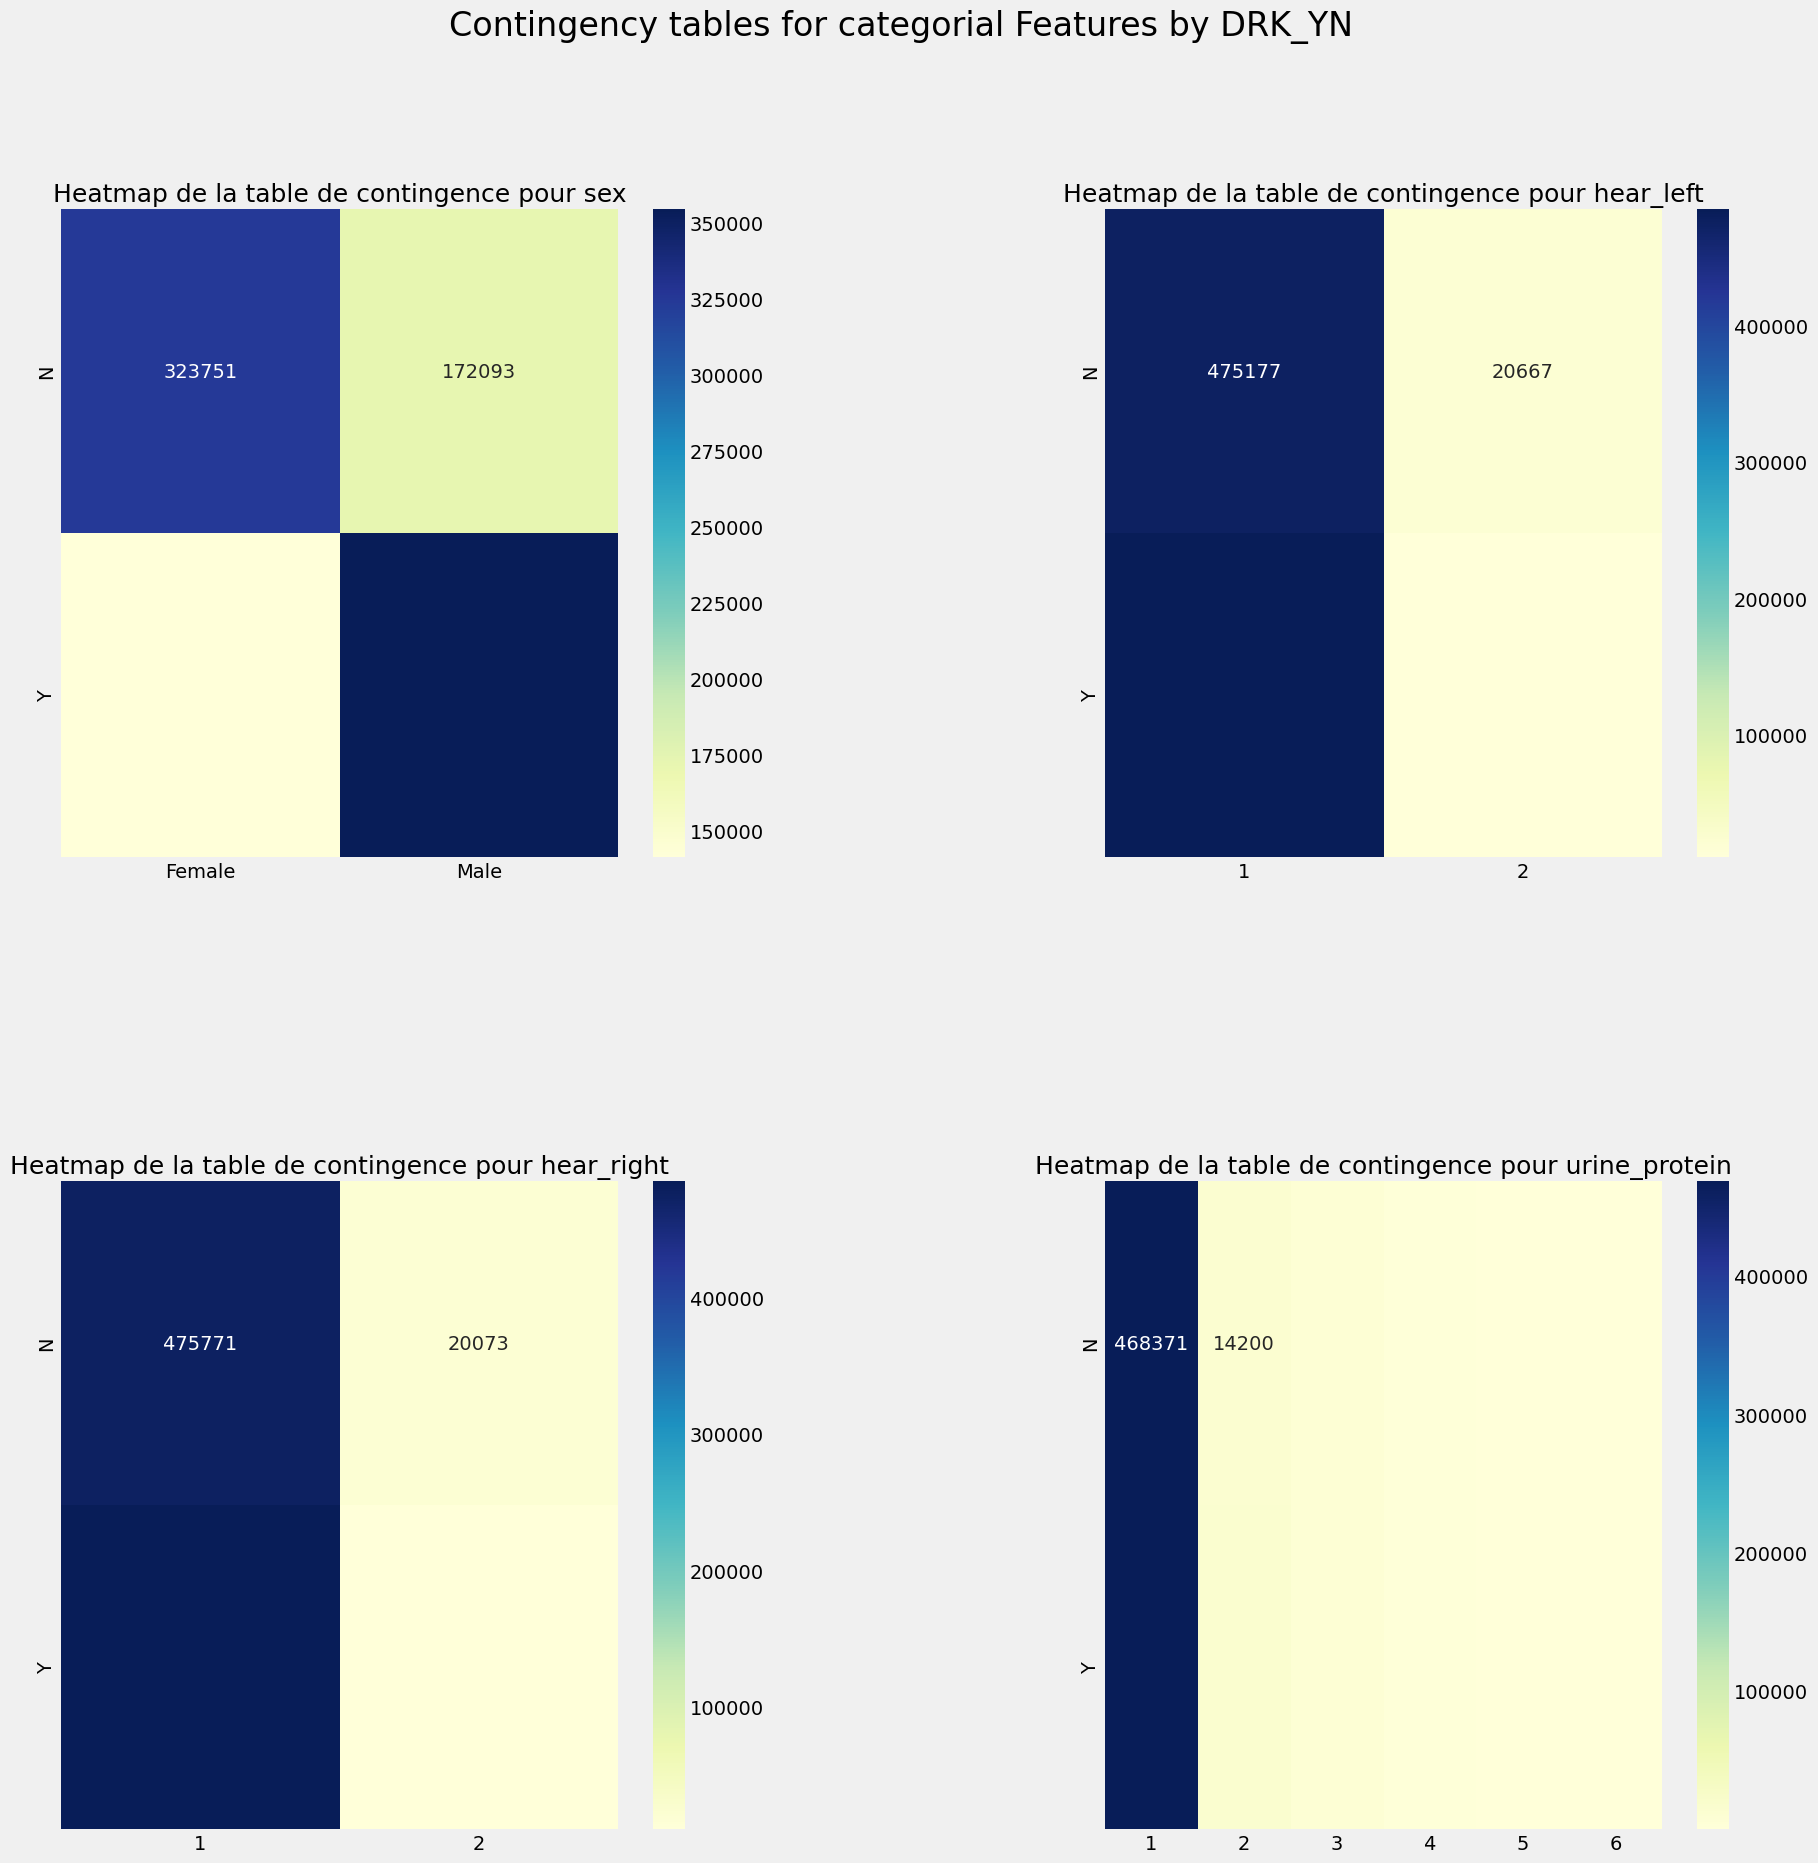

In [101]:
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Contingency tables for categorial Features by DRK_YN', fontsize=24)

for i, feature in enumerate(cat_features):
    # Table de contingence
    contingency_table = pd.crosstab(df_smoking_drinking['DRK_YN'], df_smoking_drinking[feature])
    print(f'Table de contingence pour {feature}:\n', contingency_table)
    
    # Test du Chi-2
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f'Chi-2 Statistique: {chi2}, p-value: {p}\n')

    # Add a new subplot iteratively
    ax = plt.subplot(2, 2, i+1)
    # Plot the distribution of each feature
    sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='d')
    # Chart formatting
    ax.set_title(f'Heatmap de la table de contingence pour {feature}', fontsize=18)
    ax.set_ylabel("")
    ax.set_xlabel("")

plt.show()

<font color='red'>**Interprétation:**</font> 

Les tables de contingence et les tests d'hypothèses correspondants montrent des différences significatives entre toutes les variables catégorielles et la variable cible DRK_YN.

Table de contingence pour sex:
 sex               Female    Male
SMK_stat_type_cd                
1                 437751  164680
2                  10922  164022
3                  16248  197697
Chi-2 Statistique: 409412.3860986937, p-value: 0.0

Table de contingence pour hear_left:
 hear_left              1      2
SMK_stat_type_cd               
1                 582577  19854
2                 168184   6760
3                 209337   4608
Chi-2 Statistique: 1030.37619871797, p-value: 1.805723733268251e-224

Table de contingence pour hear_right:
 hear_right             1      2
SMK_stat_type_cd               
1                 583016  19415
2                 168608   6336
3                 209485   4460
Chi-2 Statistique: 929.166775545659, p-value: 1.713950623442947e-202

Table de contingence pour urine_protein:
 urine_protein          1      2     3     4     5    6
SMK_stat_type_cd                                      
1                 570238  17998  9365  3527  1045  258
2      

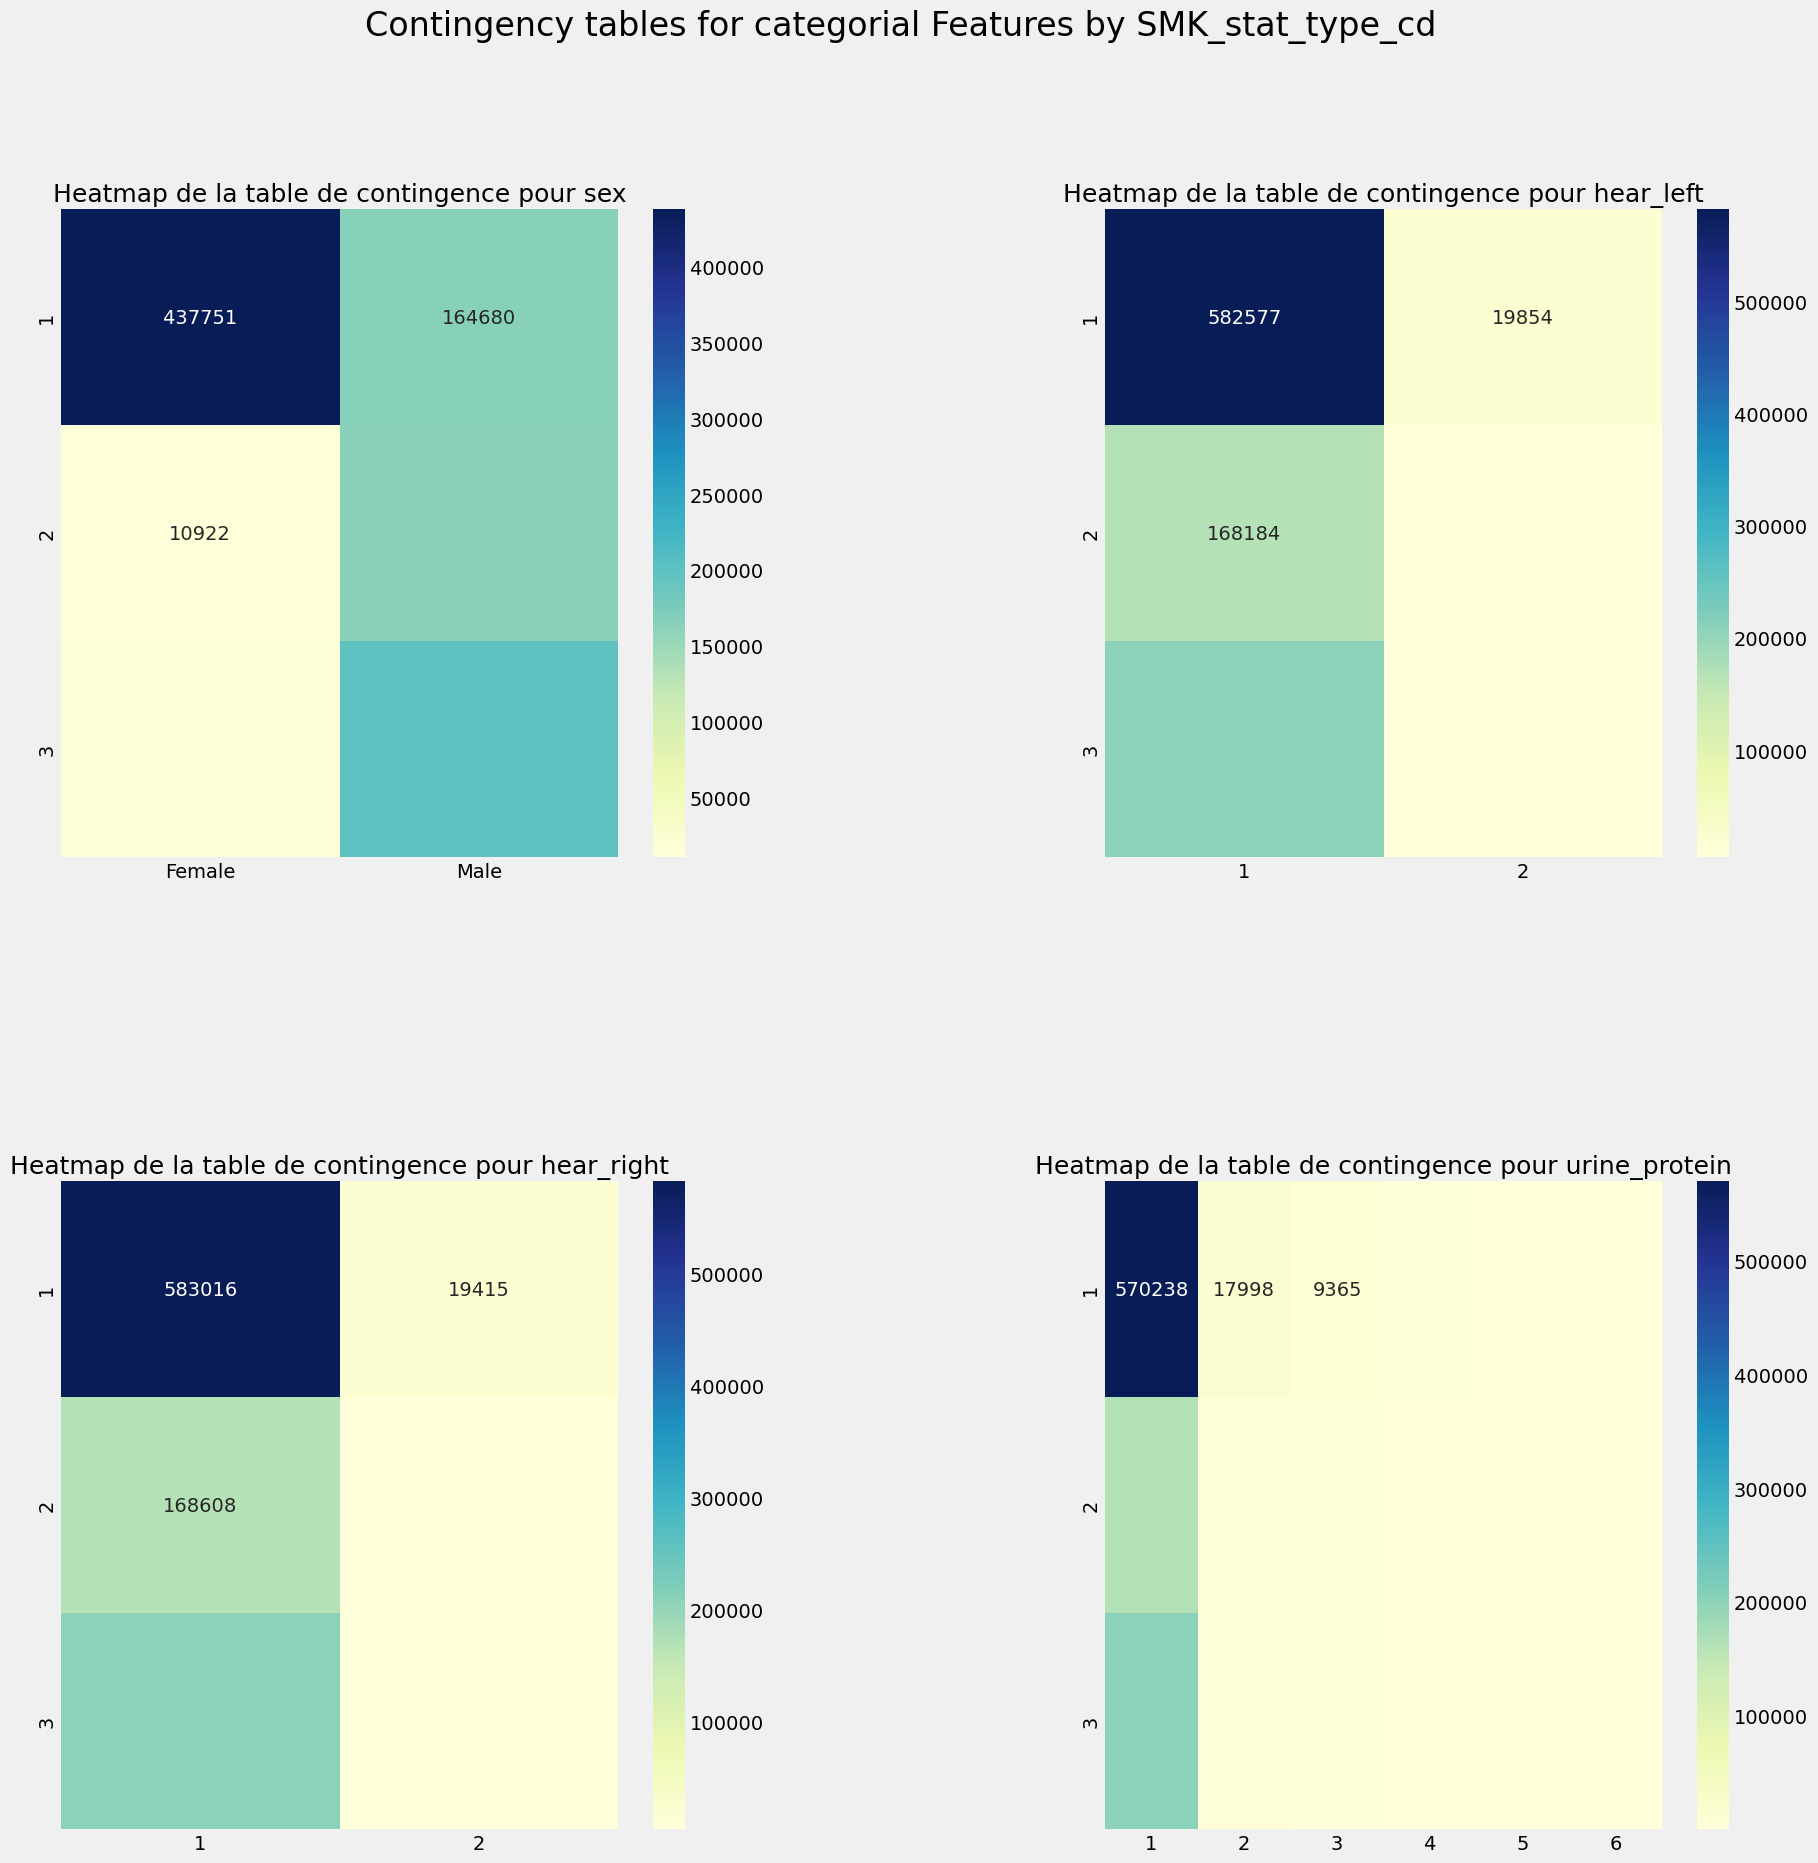

In [102]:
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Contingency tables for categorial Features by SMK_stat_type_cd', fontsize=24)

for i, feature in enumerate(cat_features):
    # Table de contingence
    contingency_table = pd.crosstab(df_smoking_drinking['SMK_stat_type_cd'], df_smoking_drinking[feature])
    print(f'Table de contingence pour {feature}:\n', contingency_table)
    
    # Test du Chi-2
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f'Chi-2 Statistique: {chi2}, p-value: {p}\n')

    # Add a new subplot iteratively
    ax = plt.subplot(2, 2, i+1)
    # Plot the distribution of each feature
    sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='d')
    # Chart formatting
    ax.set_title(f'Heatmap de la table de contingence pour {feature}', fontsize=18)
    ax.set_ylabel("")
    ax.set_xlabel("")

plt.show()

<font color='red'>**Interprétation:**</font> 

Nous constatons la même chose pour la variable cible SMK_stat_type_cd (fumeurs).

# Analyse approfondie

<Figure size 2000x2000 with 0 Axes>

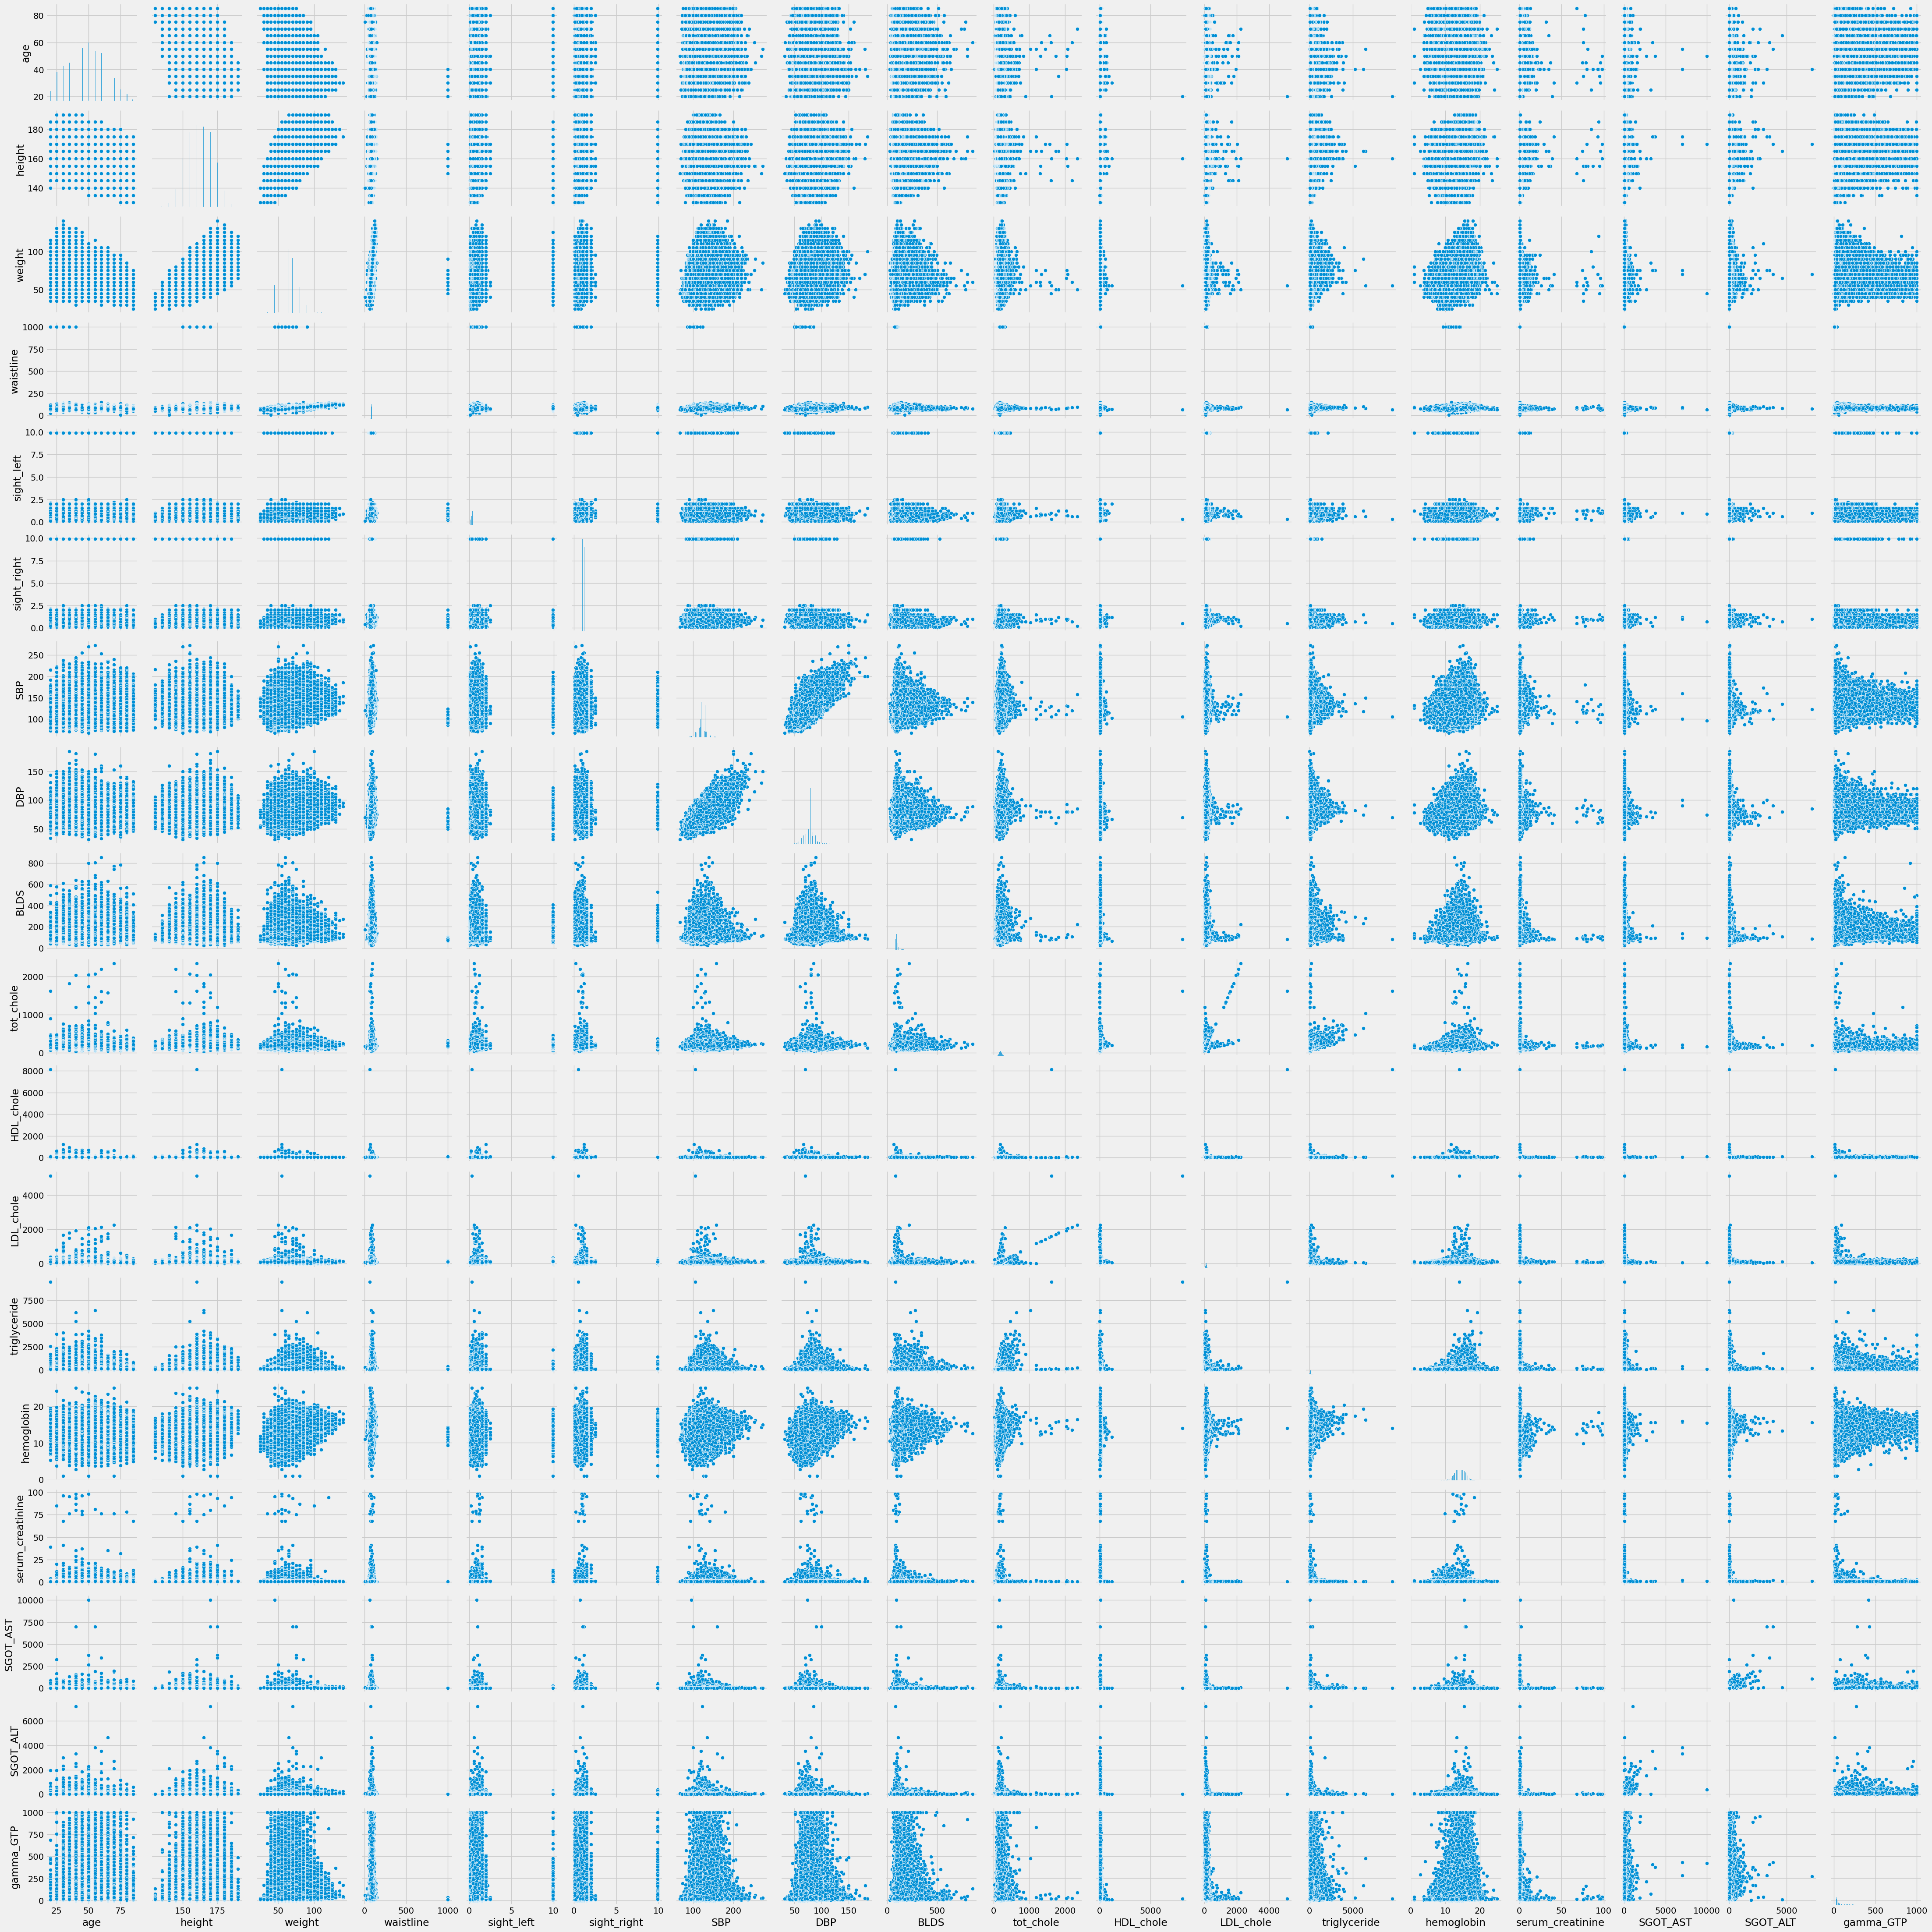

In [109]:
plt.figure(figsize=(20, 20))
sns.pairplot(df_smoking_drinking[cont_features])
plt.show()

<font color='red'>**Interprétation:**</font> 

Nous remarquons quelques relations linéaires entre les variables continues, notamment entre SBP et DBP, ou encore entre LDL_chole et tot_chol (ce qui semble cohérent). Ces relations sont vérifiées par la matrie de corrélation suivante:

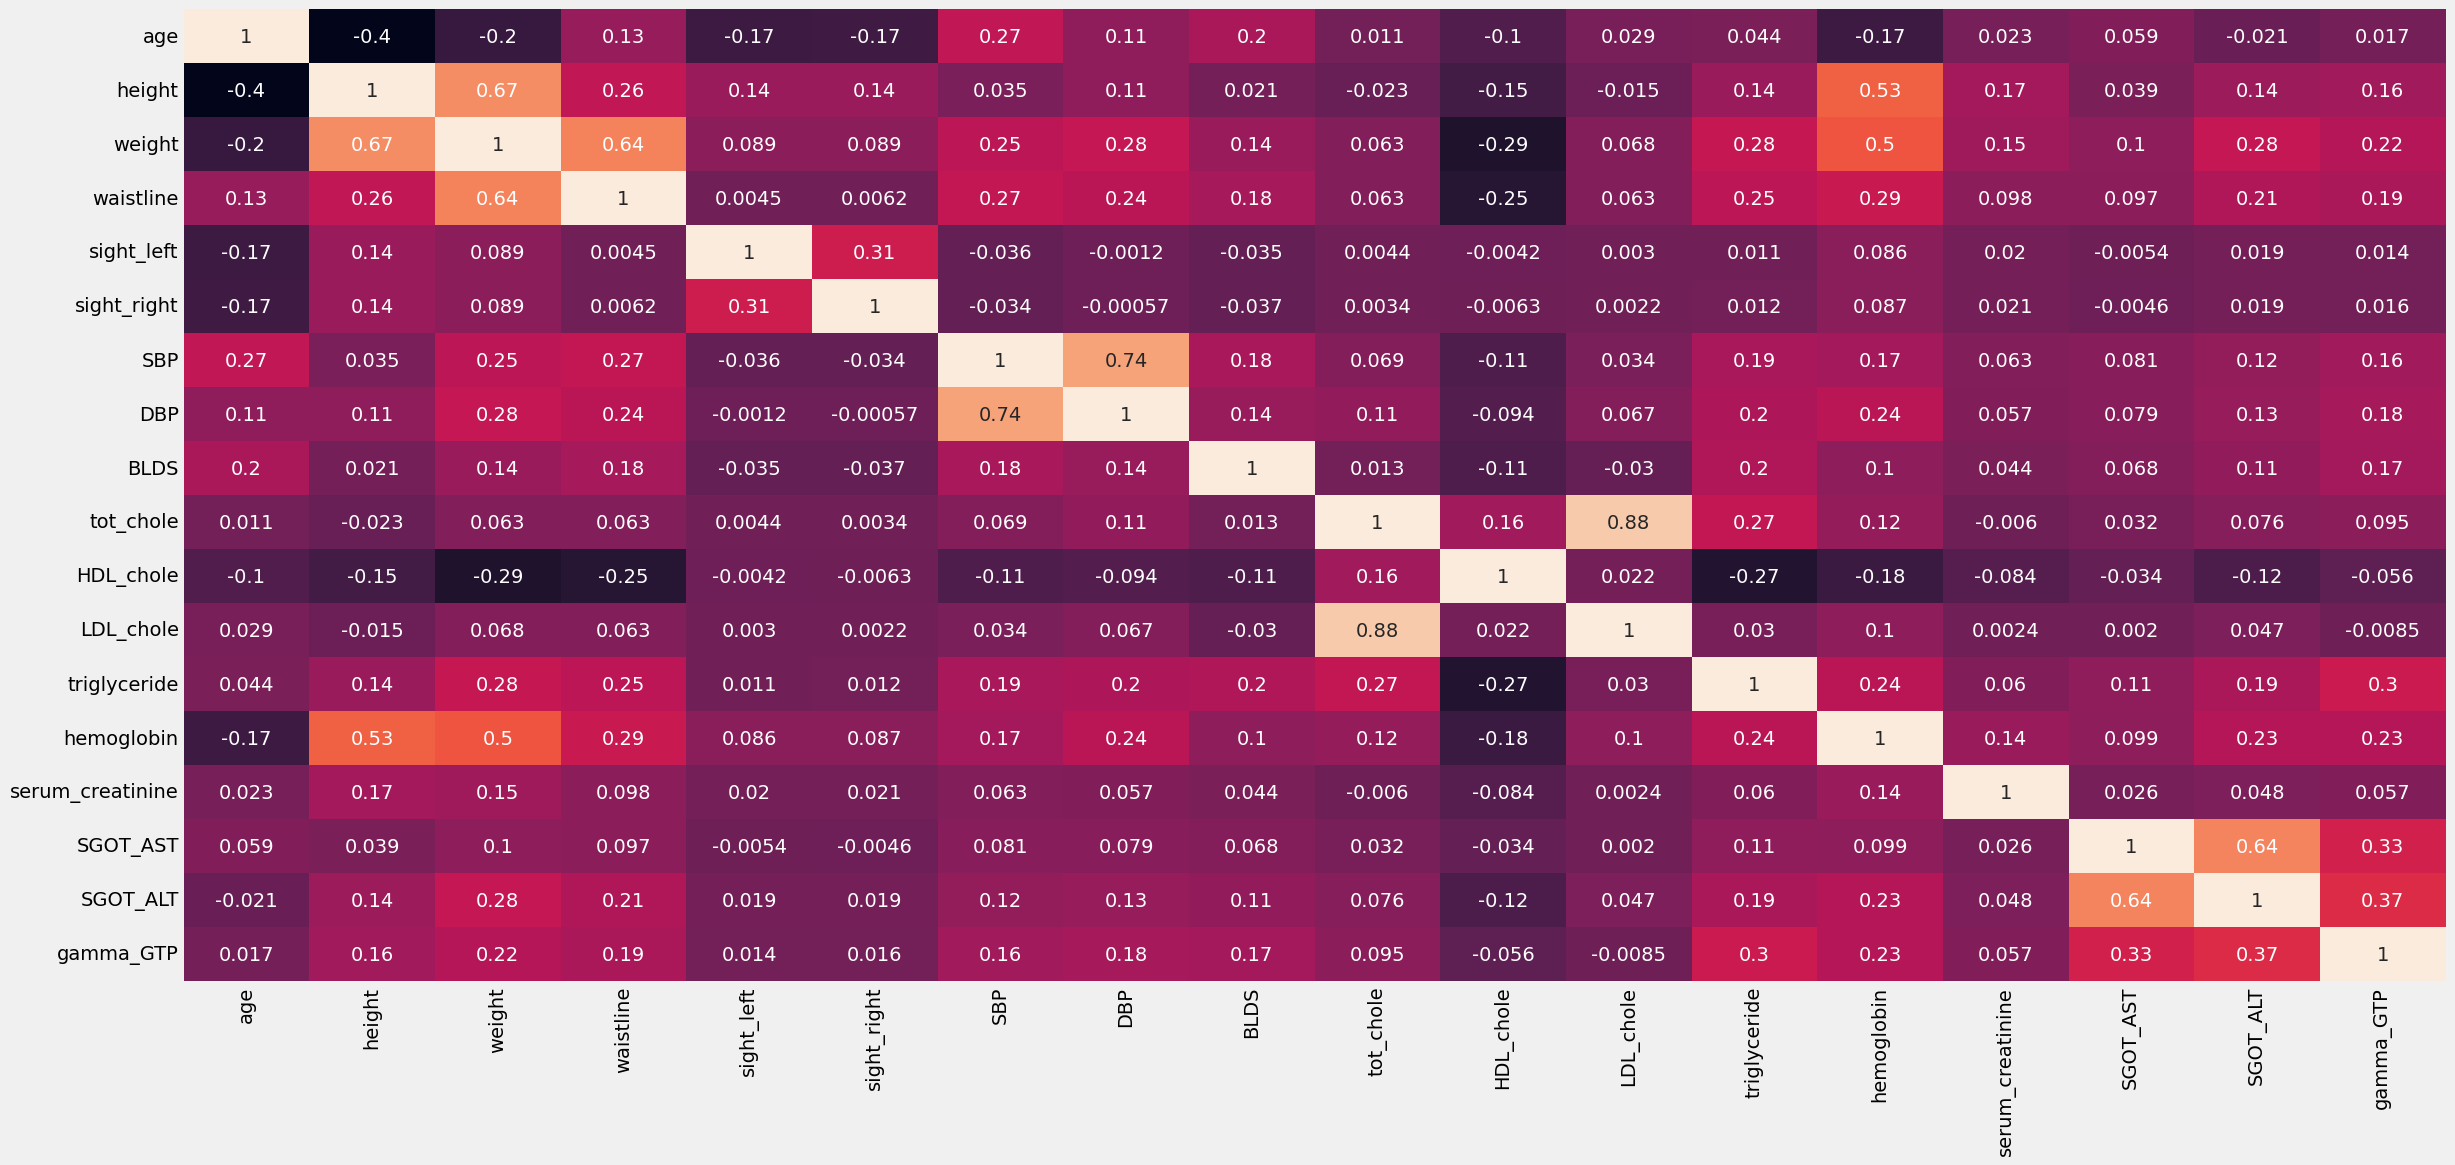

In [37]:
correlation_matrix = df_smoking_drinking[cont_features].corr()

plt.figure(figsize=(26, 12))
sns.heatmap(correlation_matrix, annot=True, cbar=False)
plt.show()

## Fumeurs vs sexe

<Axes: xlabel='SMK_stat_type_cd', ylabel='count'>

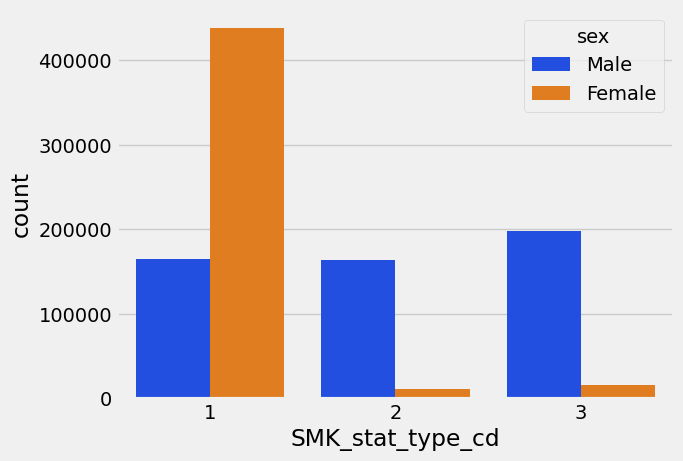

In [31]:
sns.countplot(data = df_smoking_drinking, x='SMK_stat_type_cd',hue='sex',palette='bright')

<font color='red'>**Interprétation:**</font> 

A priori : 
- beaucoup plus d'hommes sont fumeurs
- très peu de femmes sont anciennes fumeuses/fumeuses

## Fumeurs vs taux d'hemoglobine

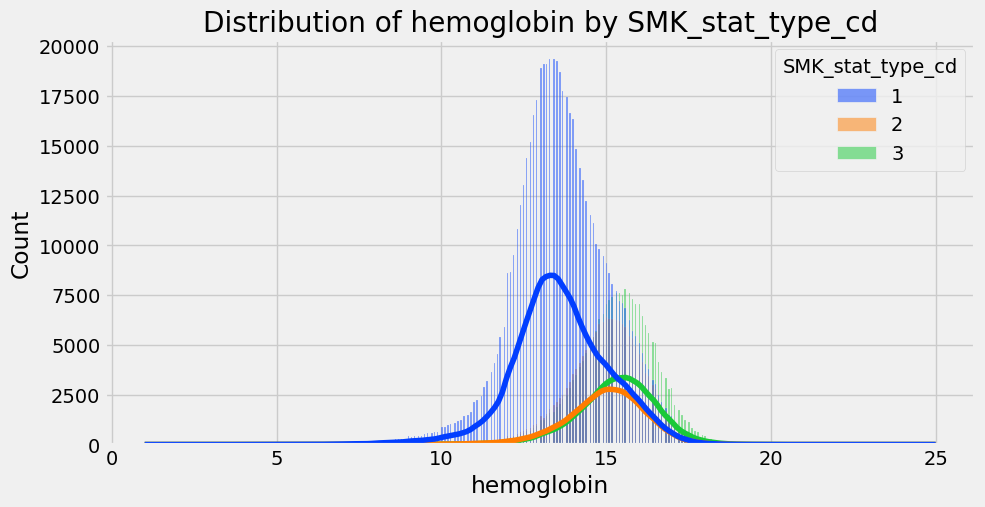

In [33]:
# Histogrammes de la variable hemoglobin par rapport à la variable cible SMK_stat_type_cd
plt.figure(figsize=(10, 5))
sns.histplot(data=df_smoking_drinking, x='hemoglobin', hue='SMK_stat_type_cd', kde=True, palette='bright')
plt.title('Distribution of hemoglobin by SMK_stat_type_cd')
plt.show()

<font color='red'>**Interprétation:**</font> 

A priori, il est possible d'identifier les non fumeurs à l'aide de leur taux d'hemoglobine.

## Fumeurs vs buveurs

<Axes: xlabel='DRK_YN', ylabel='count'>

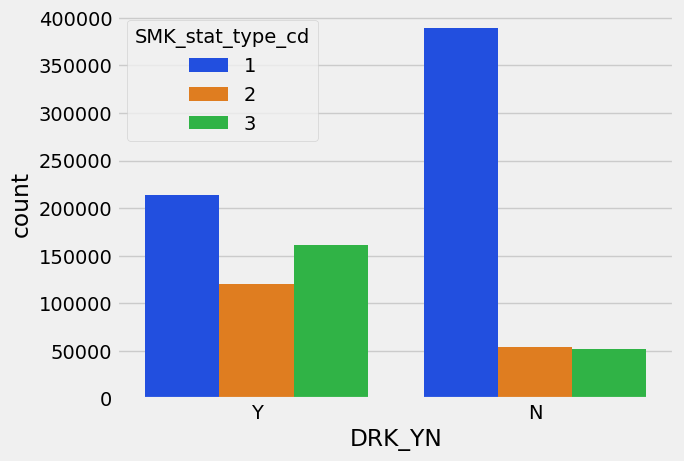

In [35]:
sns.countplot(data = df_smoking_drinking, x='DRK_YN',hue='SMK_stat_type_cd',palette='bright')

<font color='red'>**Interprétation:**</font> 

La plupart des fumeurs sont également consommateurs d'alcool.

# Tests d'hypothèses

## Adéquation à la loi normale des variables continues

In [105]:
# Test d'adéquation à la loi normale des variables continues
for feature in cont_features:
    # Test de normalité
    stat, p = sp.stats.shapiro(df_smoking_drinking[feature])
    print(f'{feature}:\n Statistique={stat}, p-value={p}')
    # Test de skewness
    skewness = skew(df_smoking_drinking[feature])
    print(f'Skewness={skewness}\n')

age:
 Statistique=0.9743854999542236, p-value=0.0
Skewness=0.1536520468964294

height:
 Statistique=0.9761446118354797, p-value=0.0
Skewness=-0.022721120984535326

weight:
 Statistique=0.9642830491065979, p-value=0.0
Skewness=0.5765357801280898

waistline:
 Statistique=0.6817023754119873, p-value=0.0
Skewness=26.78927666222986

sight_left:
 Statistique=0.46897822618484497, p-value=0.0
Skewness=9.994615456879938

sight_right:
 Statistique=0.46908295154571533, p-value=0.0
Skewness=10.03365719630939

SBP:
 Statistique=0.9831454753875732, p-value=0.0
Skewness=0.482034335083141

DBP:
 Statistique=0.9865297079086304, p-value=0.0
Skewness=0.4000125051724107

BLDS:
 Statistique=0.6594672203063965, p-value=0.0
Skewness=4.617488274086557

tot_chole:
 Statistique=0.9693883657455444, p-value=0.0
Skewness=1.5569243845897989

HDL_chole:
 Statistique=0.73268061876297, p-value=0.0
Skewness=104.57839326238776

LDL_chole:
 Statistique=0.9309874773025513, p-value=0.0
Skewness=5.251821852799959

triglycer

In [114]:
from scipy.stats import kstest

for feature in cont_features:
    stat, p = kstest(df_smoking_drinking[feature], 'norm', args=(df_smoking_drinking[feature].mean(), df_smoking_drinking[feature].std()))
    print(f'{feature}:\n Statistique={stat}, p-value={p}')

age:
 Statistique=0.0867042704810782, p-value=0.0
height:
 Statistique=0.10917324414007412, p-value=0.0
weight:
 Statistique=0.1163698479306618, p-value=0.0
waistline:
 Statistique=0.06708673507683782, p-value=0.0
sight_left:
 Statistique=0.2237209732200286, p-value=0.0
sight_right:
 Statistique=0.22412219592314309, p-value=0.0
SBP:
 Statistique=0.06940810769820666, p-value=0.0
DBP:
 Statistique=0.07463194055914013, p-value=0.0
BLDS:
 Statistique=0.18655140162928896, p-value=0.0
tot_chole:
 Statistique=0.03149450962601541, p-value=0.0
HDL_chole:
 Statistique=0.07115176885690822, p-value=0.0
LDL_chole:
 Statistique=0.031195648479566684, p-value=0.0
triglyceride:
 Statistique=0.16054894500371802, p-value=0.0
hemoglobin:
 Statistique=0.03390824447674756, p-value=0.0
serum_creatinine:
 Statistique=0.24739296939434455, p-value=0.0
SGOT_AST:
 Statistique=0.27892304540990953, p-value=0.0
SGOT_ALT:
 Statistique=0.23744056947618636, p-value=0.0
gamma_GTP:
 Statistique=0.2754075094282981, p-valu

<font color='red'>**Interprétation:**</font> 

A priori, tous les tests semblent être significatifs. Cependant, les tests utilisés sont très sensibles à la taille de l'échantillon et nous ne pouvons donc pas en tirer de conclusion. Etudions les QQ-plots des variables.

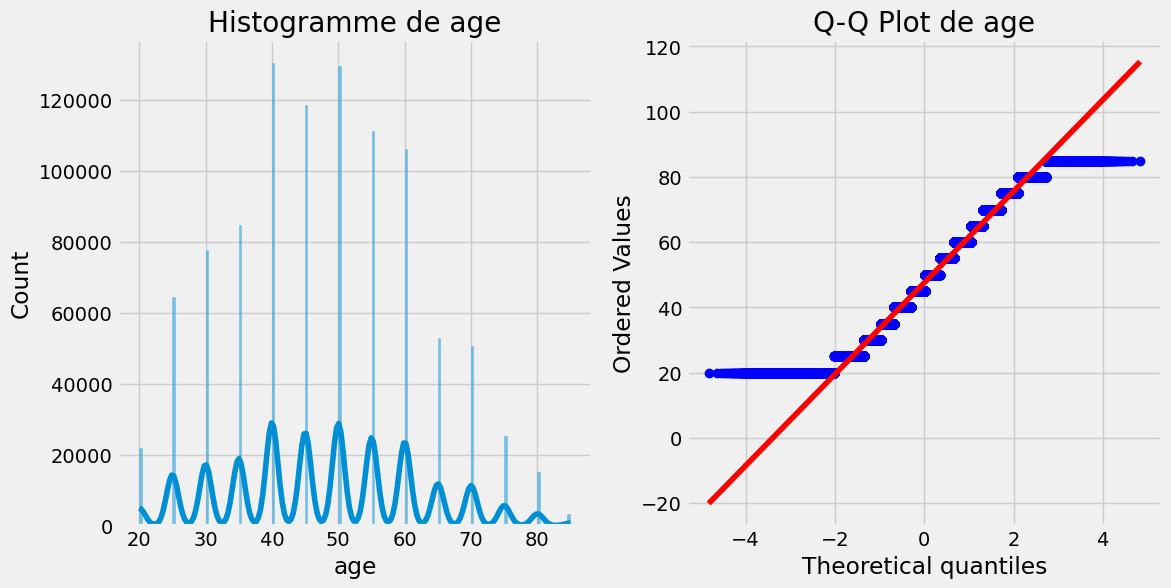

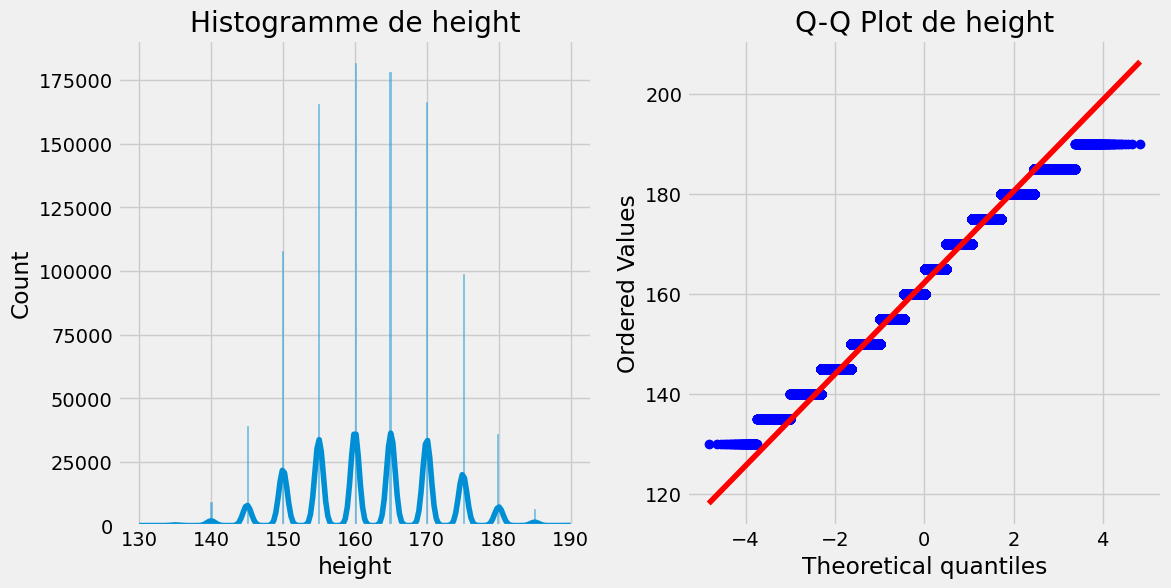

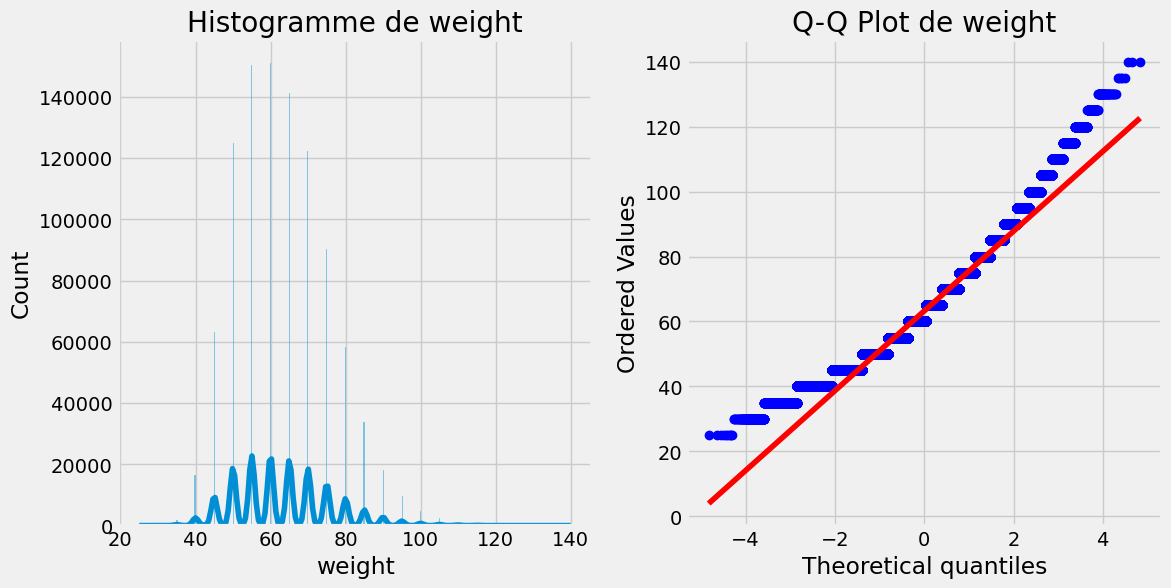

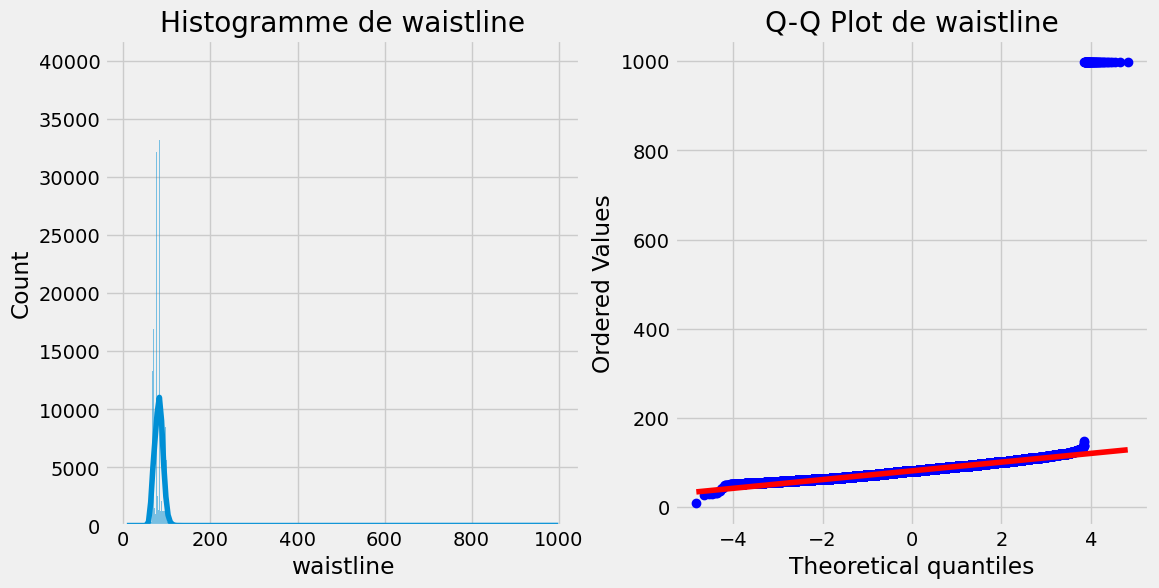

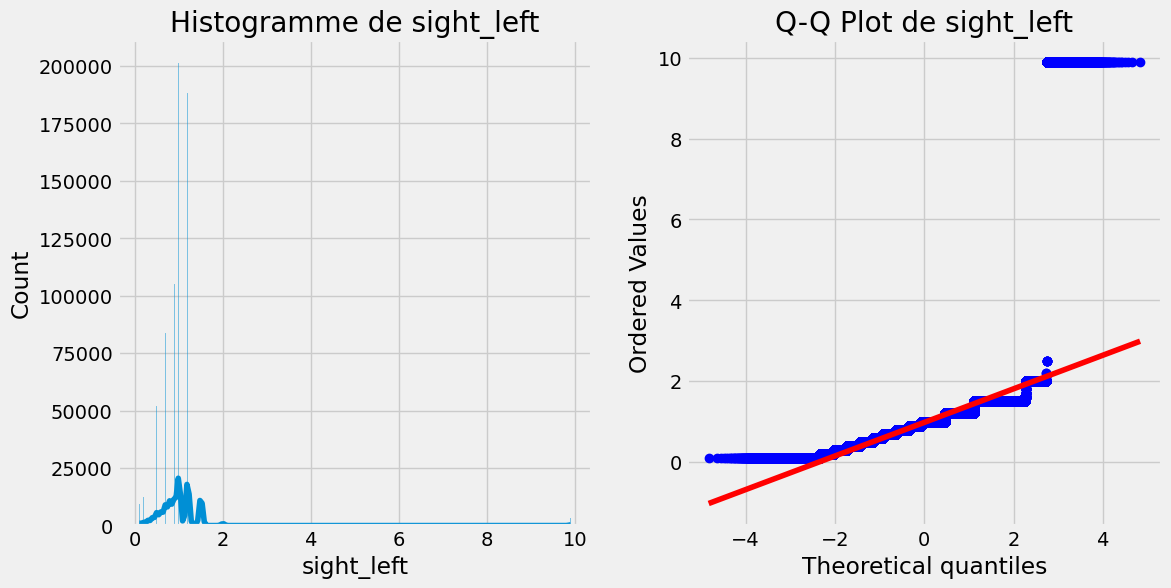

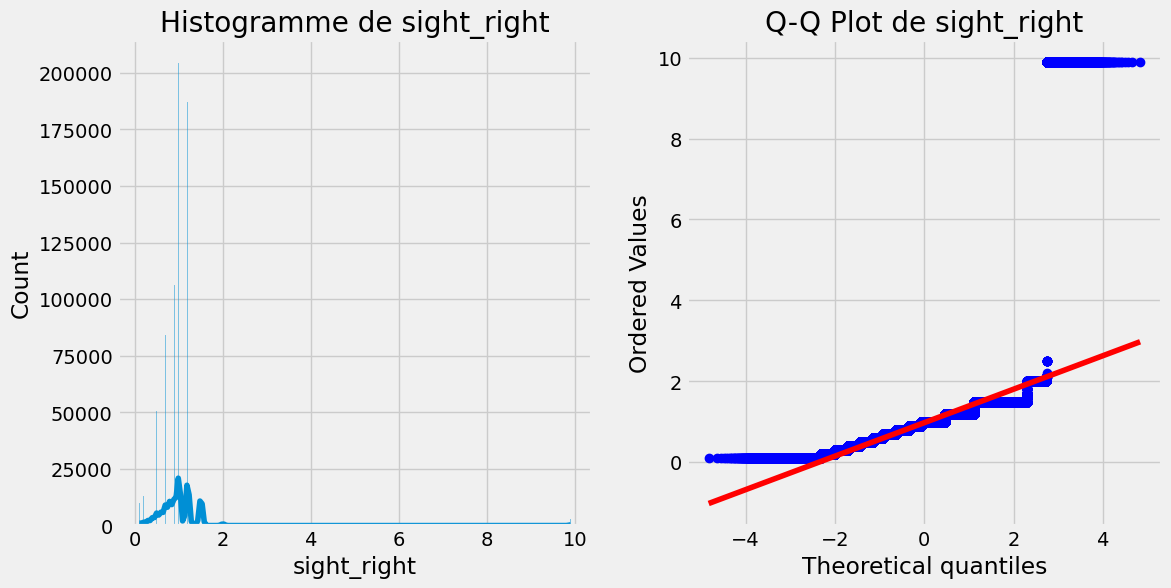

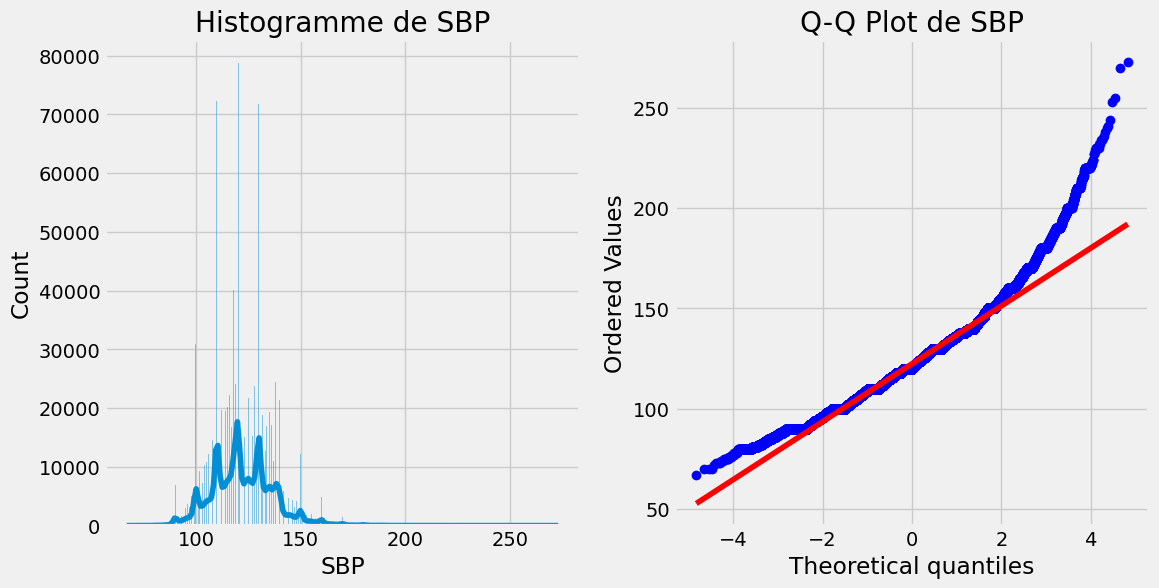

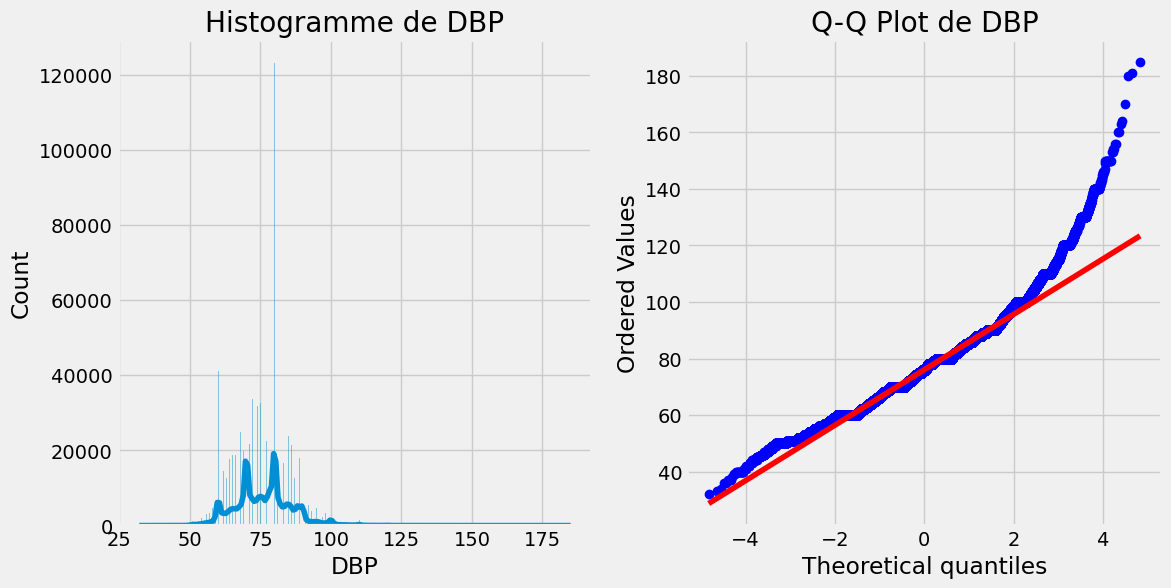

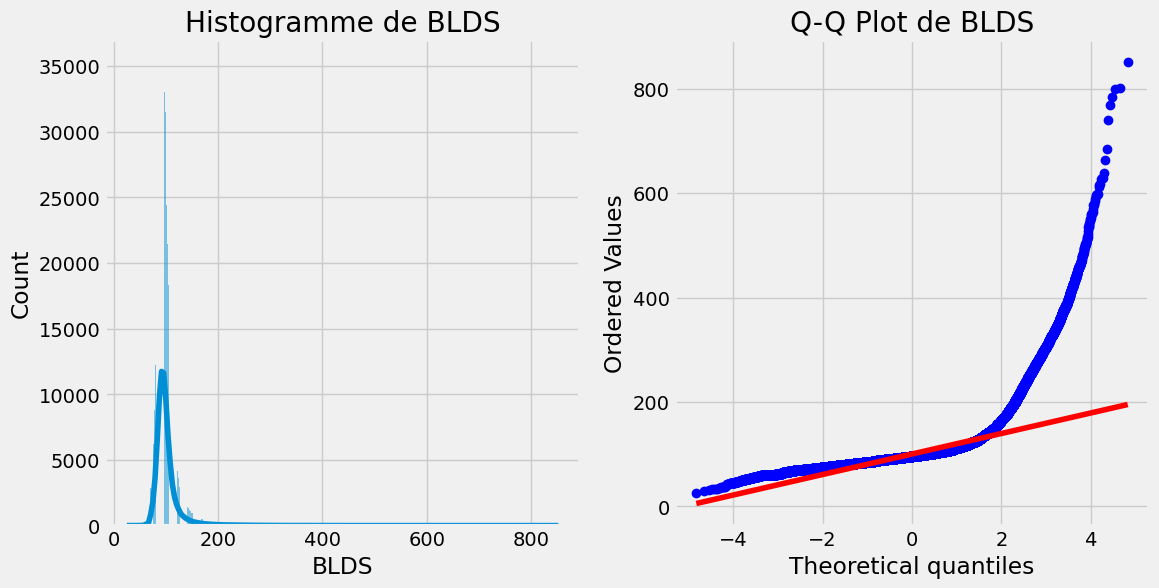

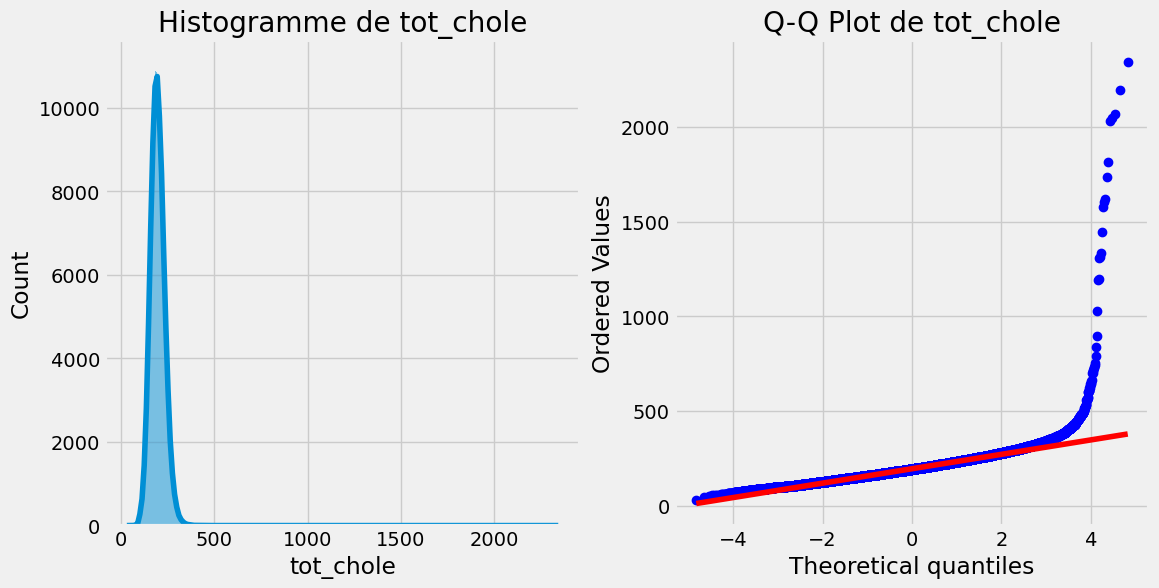

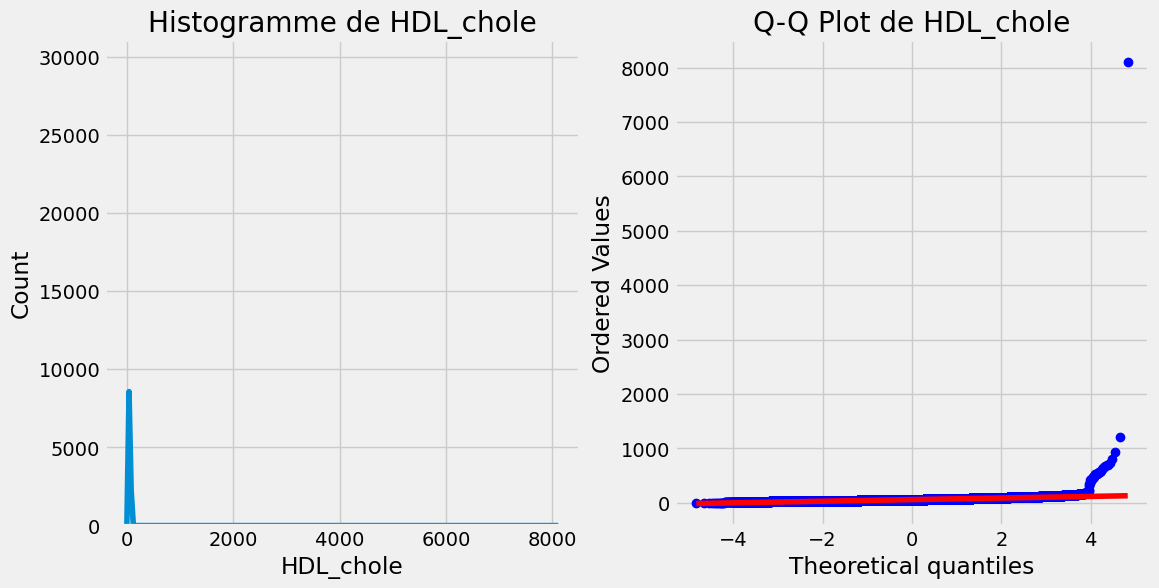

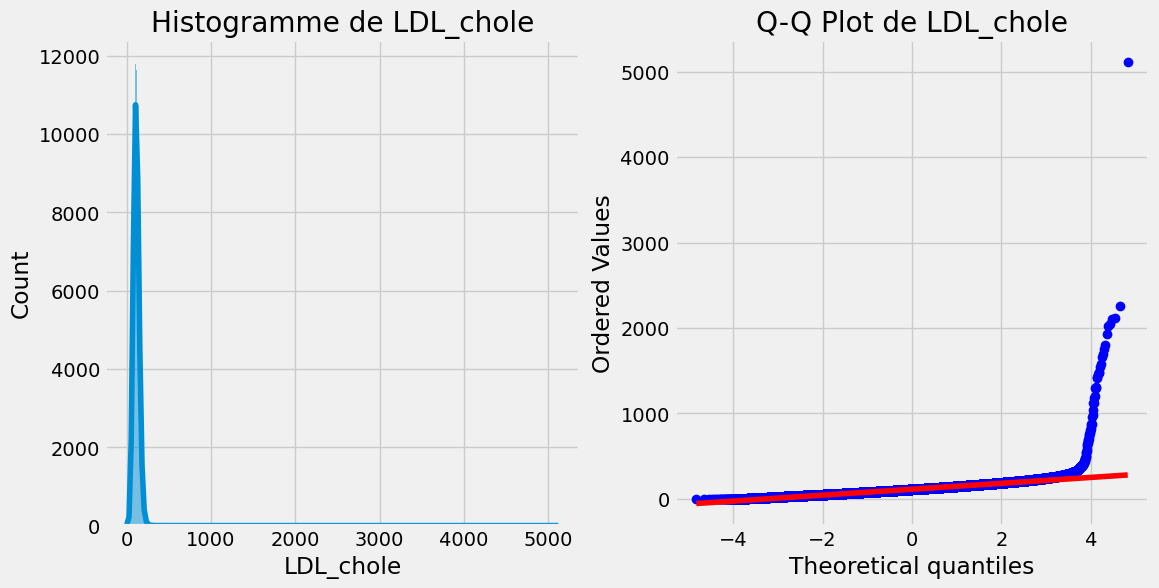

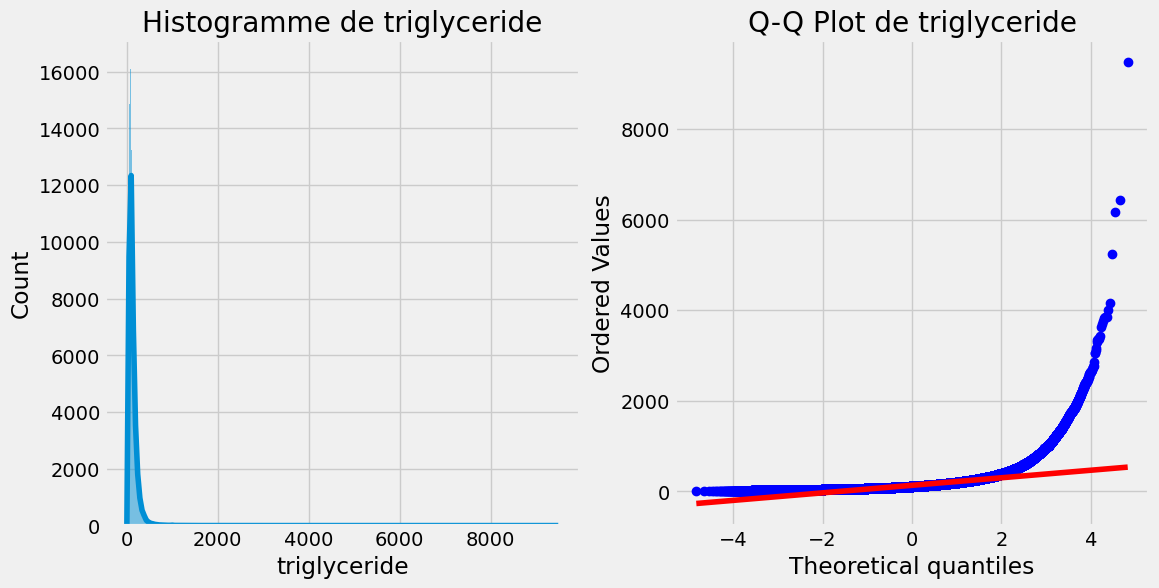

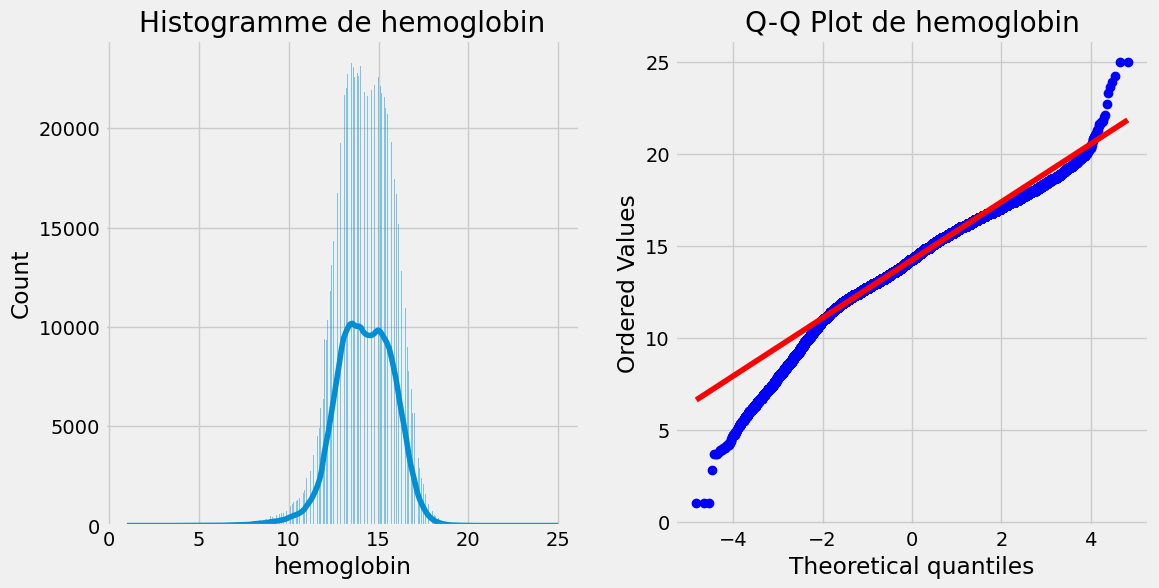

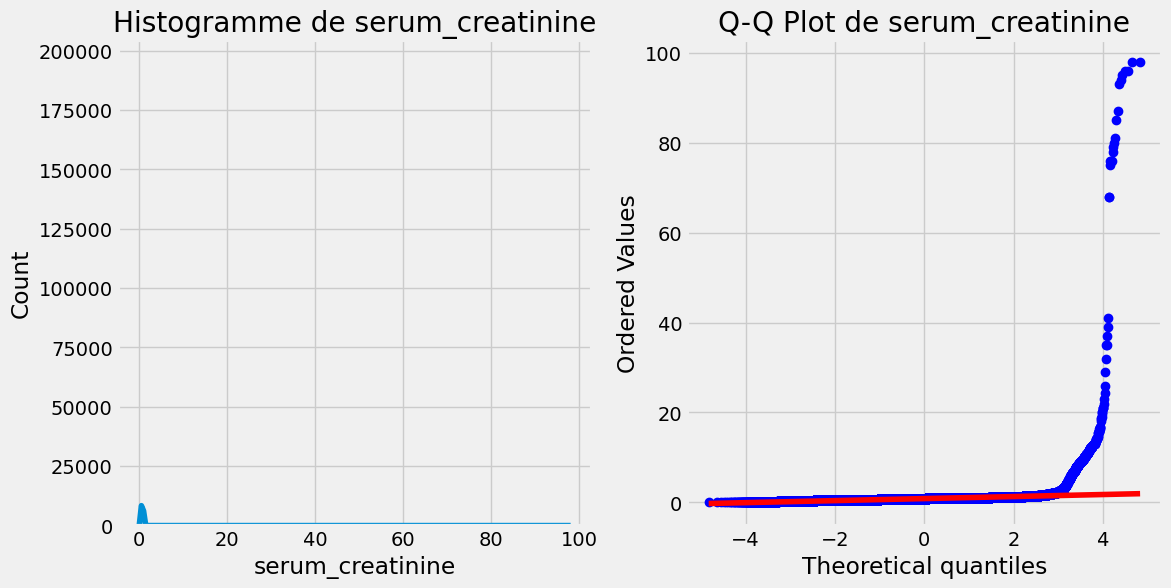

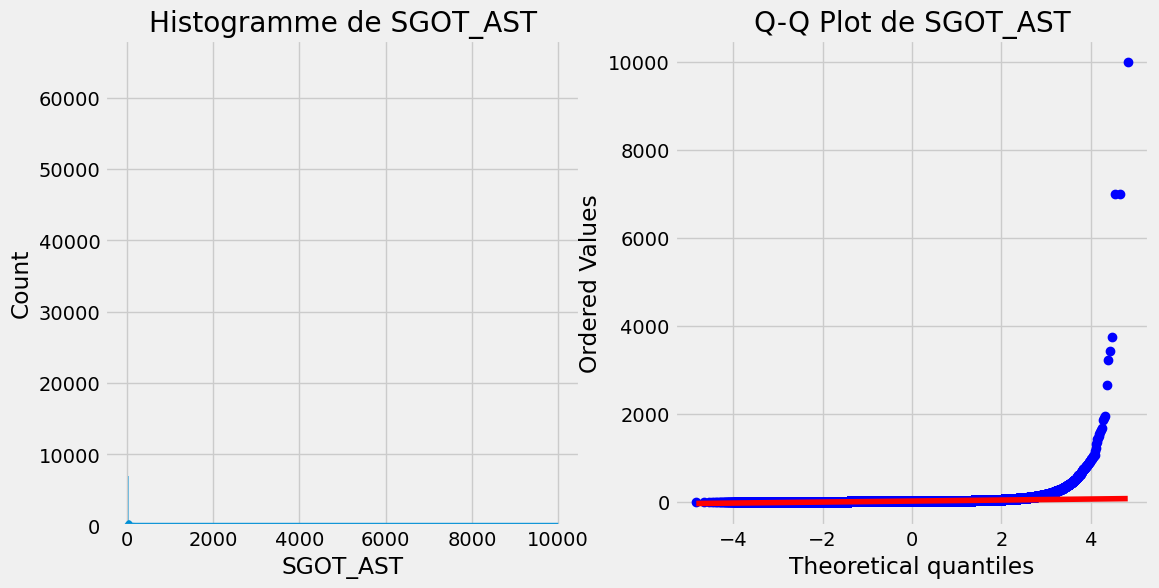

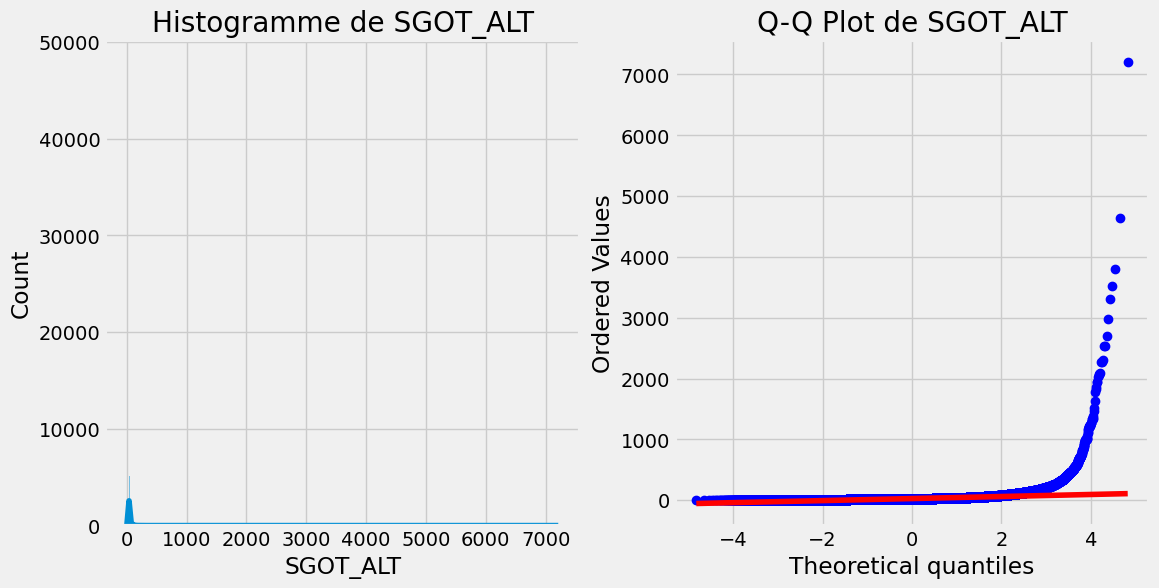

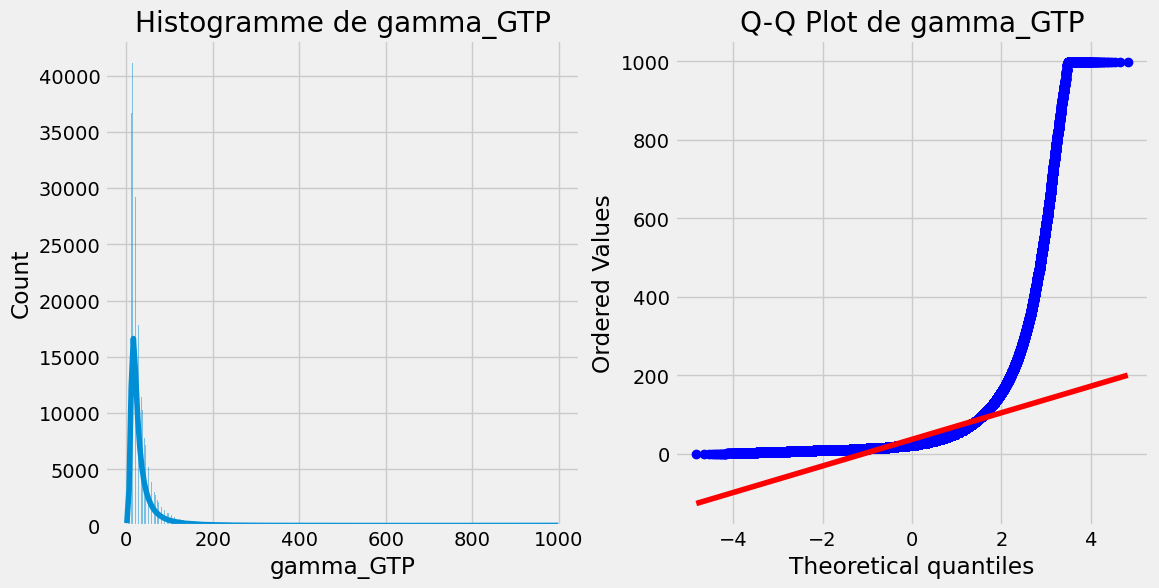

In [111]:
for feature in cont_features:
    plt.figure(figsize=(12, 6))
    
    # Histogramme
    plt.subplot(1, 2, 1)
    sns.histplot(df_smoking_drinking[feature], kde=True)
    plt.title(f'Histogramme de {feature}')
    
    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(df_smoking_drinking[feature], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot de {feature}')
    
    plt.show()

## Distribution différente selon la variable cible DRK_YN

Les buveurs ont un taux d'hémoglobine significativement différent.

$(H0):$ Les taux moyens sont égaux chez les buveurs et ceux qui ne boivent pas.

$(H1):$ Les taux moyens sont différents chez les buveurs et ceux qui ne boivent pas.

--> Utilisation d'un test de Stutent (T-Test). Les buveurs et ceux qui ne boivent pas sont en échantillon quasi égaux, les conditions pour utiliser le test sont vérifiées.

In [117]:
from scipy.stats import ttest_ind, levene, mannwhitneyu

# Séparer les données en fonction de la variable cible
df_drinking_neg = df_smoking_drinking[df_smoking_drinking['DRK_YN'] == 'N']
df_drinking_pos = df_smoking_drinking[df_smoking_drinking['DRK_YN'] == 'Y']

# Test de Student
stat, p = ttest_ind(df_drinking_neg['hemoglobin'], df_drinking_pos['hemoglobin'])
print(f'Test de Student:\n Statistique={stat}, p-value={p}')

# Test de Levene pour l'homogénéité des variances
levene_stat, levene_p = levene(df_drinking_neg['hemoglobin'], df_drinking_pos['hemoglobin'])
print(f'Test de Levene pour l\'homogénéité des variances:\n Statistique={levene_stat}, p-value={levene_p}')

# Calcul de la taille de l'effet (d de Cohen)
mean_diff = np.mean(df_drinking_neg['hemoglobin']) - np.mean(df_drinking_pos['hemoglobin'])
pooled_std = np.sqrt((np.var(df_drinking_neg['hemoglobin'], ddof=1) + np.var(df_drinking_pos['hemoglobin'], ddof=1)) / 2)
cohen_d = mean_diff / pooled_std
print(f'Taille de l\'effet (d de Cohen): {cohen_d}')

# Test non paramétrique de Mann-Whitney U
u_stat, u_p = mannwhitneyu(df_drinking_neg['hemoglobin'], df_drinking_pos['hemoglobin'])
print(f'Test de Mann-Whitney U:\n Statistique={u_stat}, p-value={u_p}')


Test de Student:
 Statistique=-312.3627505983693, p-value=0.0
Test de Levene pour l'homogénéité des variances:
 Statistique=108.62489282668852, p-value=1.9669145854319737e-25
Taille de l'effet (d de Cohen): -0.6274580732593963
Test de Mann-Whitney U:
 Statistique=77793938683.0, p-value=0.0


<font color='red'>**Interprétation:**</font> 

- Test de Student :

La p-value extrêmement faible indique que la différence des moyennes des taux d'hémoglobine entre les fumeurs et les non-fumeurs est hautement significative. Cependant, le test de Levene pour l'Homogénéité des Variances a une p-value très faible. Cela indique que les variances des taux d'hémoglobine entre les fumeurs et les non-fumeurs ne sont pas égales, et donc que l'une des hypothèses du test t est violée, ce qui rend le résultat du test t moins fiable.

- Taille de l'Effet (d de Cohen) :

Le d de Cohen de -0.627 est modérément grand, indiquant une différence significative et pratiquement importante entre les deux groupes. Ce score est négatif, ce qui signifie que le taux d'hémoglobine est en moyenne plus faible chez les fumeurs.

- Test de Mann-Whitney U :

La p-value extrêmement faible indique que les distributions des taux d'hémoglobine entre les fumeurs et les non-fumeurs sont significativement différentes. Comme ce test ne suppose pas l'égalité des variances ni la normalité, son résultat est plus fiable dans notre contexte.

<font color='red'>**=> Nous rejetons H0**</font> 
